<a href="https://www.kaggle.com/code/abdelazizelsawy/cosmetics-company-in-eg?scriptVersionId=102077969" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {border: 1px  LightSteelBlue solid !important;
  color: darkblue
 !important;}

# Data analysis for a  pharmacy supplies company

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#quest">Analysis plan</a></li>
<li><a href="#wrangling1">Data Wrangling *1*</a></li>
<li><a href="#assessing1">Data Assessing *1*</a></li>
<li><a href="#cleaning">Data Cleaning</a></li> 
<li><a href="#assessing2">Data Assessing *2*</a></li>
<li><a href="#wrangling2">Data Wrangling *2*</a></li>
<li><a href="#visualization">Visualization</a></li>
<li><a href="#conclusion">Conclusion</a></li>      
</ul>


<a id='intro'></a>
# Introduction


## Data 
> <li> This data set contains 4 sheets of data from company working in the field of medical supplies
 
### **Products** 
<table >
  <tr>
    <th>Column Name </th>
    <th>Clarification</th>
  </tr>
  <tr>
    <td>DATE_</td>
    <td>The date "year , month and day</td>
  </tr>
  <tr>
    <td>ClintName</td>
    <td>Customer name</td>
  </tr>
  <tr>
    <td>AccountId</td>
    <td>Customer ID and it's a foreign key to a Primary key in "accounts" sheet</td>
  </tr>
  <tr>
    <td>ProductName</td>
    <td>Full product name</td>
  </tr>
  <tr>
    <td>ProductId</td>
    <td>Product ID</td>
  </tr>
  <tr>
    <td>CompanyId</td>
    <td>Manufacturer ID and it's a foreign key to a Primary key in "company" sheet</td>
  </tr>
      <tr>
    <td>CATEGORY1</td>
    <td>Main category ID and it's a foreign key to a Primary key in "proprties" sheet</td>
  </tr>
      <tr>
    <td>CATEGORY3</td>
    <td>Subcategory ID and it's a foreign key to a Primary key in "proprties" sheet</td>
  </tr>
          <tr>
    <td>InvoicesId</td>
    <td>Bill ID can be repeated</td>
  </tr>
<tr>
    <td>UnitSellPrice</td>
    <td>Sell price for the product</td>
  </tr>
  <tr>
    <td>ConsumerPrice</td>
    <td>A price suggested by the wholesaler to retailers to sell to the consumer, but it is not compulsory</td>
  </tr>
   <tr>
    <td>CostPrice</td>
    <td> ِThe net cost price</td>
  </tr>
  <tr>
    <td>QTY</td>
    <td> ِQuantities of the item sold</td>
  </tr>
</table>


### **Proprties**

<table >
  <tr>
    <th>Column Name </th>
    <th>Clarification</th>
  </tr>
  <tr>
    <td>PROPRTIES_ID</td>
    <td>Primary key represents classifications of products in general, a category and a sub-category</td>
  </tr>
  <tr>
    <td>PROPRTIES_NAME</td>
    <td>Classification name for both category and sub-category</td>
  </tr>
  <tr>
    <td>PROPRTIES_TYPE</td>
    <td>This code is what determines whether the name belongs to a main ( **1** ) or sub-category (**2 , -1**)</td>
  </tr>
</table>


### **Company**
- **A very important note : that Manufacturer is not the vendor**
<table >
  <tr>
    <th>Column Name </th>
    <th>Clarification</th>
  </tr>
  <tr>
    <td>COP_ID</td>
    <td>Primary key represents Manufacturer ID</td>
  </tr>
  <tr>
    <td>COP_NAME</td>
    <td>Manufacturer name</td>
  </tr>
 
</table>


### **Accounts**

<table >
  <tr>
    <th>Column Name </th>
    <th>Clarification</th>
  </tr>
  <tr>
    <td>CLIENT_NAME</td>
    <td>Customer name</td>
  </tr>
  <tr>
    <td>CLIENT_ID</td>
    <td>Primary key represents customer ID</td>
  </tr>
  <tr>
    <td>LOCATION_ID</td>
    <td>Area Id represents the ID of customer's state can be repeated</td>
  </tr>
  <tr>
    <td>LOCATION_NAME</td>
    <td>Area name represents the name of customer's state)</td>
  </tr>   
</table>




**Let's start**

### Introducing the company
> <li>A B2B company working in the trade of pharmacy supplies and cosmetics stores, its products are cosmetics, paper and medical supplies. It operates in a local environment and seeks to expand the circle of its customers within this environment.
    

<a id='quest'></a>
## Analysis plan
-------------------------------------------------------------------------------------------------------------------------------
<li>The first step is to call the libraries see the head for each data ,the form of each the data 
<li>The next step is to describe the data , display data information, key factor of data 
<li>then we merge all the four sheets in one dataframe, 
<li>after cleaning the data then we will move to


### Questions for analysis.
- **These are the questions we're going to answer**
- **------------------------------------------------------------------------------------------------------------------------------**<li><a href="#q1">What is the highest, most and best selling group Manufacture ?</a></li>
<li><a href="#q2">What is the highest, most and best selling group Category ?</a></li>
<li><a href="#q3">What is the highest, most and best selling group Subcategory ?</a></li>
<li><a href="#q4">What is the highest, most and best selling group Area ?</a></li>
<li><a href="#q5">What is the highest, most and best selling group Product ?</a></li>
<li><a href="#q6">What is the highest, most and best selling group Client ?</a></li>
<li><a href="#q7">What is the highest, most and best selling Month ?</a></li>
- **The question about the year will appear to have some bias because the years 2020 and 2022 are not complete.**

In [2]:
pip install arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
#import libraries
import timeit
import random
import pandas as pd
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline
import seaborn as snb
from IPython import display
from matplotlib import pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

In [6]:
#Connet the 4 xlsx-sheets .. it will take some time.

start = timeit.default_timer()

dfs={'df':'Invoices and products.xlsx','prop':'proprties.xlsx','comp':'company.xlsx','AccRegion':'account  region.xlsx'}
path= "../input/Cosmetics-company/"
for key,value in list(dfs.items()):
    exec(f'{key}=pd.read_excel("{path}{value}")', globals())
    exec(f'{key}.columns={key}.columns.str.lower()', globals())
    
stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  96.97552043200005


<a id='wrangling1'></a>
## Data Wrangling **1**

#### Invoices and porducts

In [7]:
#Explore first 10 rows.
df.head(10)

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.32,9,3.75,24
1,2020-05-03,clint2042,1951,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,4307,42,1,26,3,4.48,8,3.50,12
2,2020-05-03,clint2042,1951,ماجيك كريم,5954,31,1,7,3,7.75,9.50,6.83,6
3,2020-05-03,clint2042,1951,بنادور كريم ابيض,4660,31,1,7,3,41.56,55,33.01,6
4,2020-05-03,clint2042,1951,بنادور كريم اصفر,4661,31,1,7,3,41.56,55,36.67,3
5,2020-05-03,clint2042,1951,شفاط مخاط علي كارت,5357,5,1,159,3,6,9,5.25,5
6,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(ازرق) صغير 10%خصم,5657,22,1,7,3,7.57,8.50,7.41,3
7,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(احمر)صغير10%خصم,5658,22,1,7,3,8.01,10,7.41,3
8,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(اخضر) كبير10% خصم,5659,22,1,7,3,10.41,13,9.89,3
9,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(موف)كبير 10%خصم,5661,22,1,7,3,10.41,13,9.89,3


In [8]:
#Explore last 10 rows.
df.tail(10)

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
523308,2022-03-31,clint1834,1743,ديبرودنت معجون اسنان 50ملي كبير,5076,31,1,4,50311,29.23,38,24.78,3
523309,2022-03-31,clint2675,2584,فينوس ماكينة حلاقه حريمي اكياس,6995,46,1,14,50312,24.94,30,19.88,1
523310,2022-03-31,clint2675,2584,سندريلا كبير /موف40قطعة,5296,69,3,40,50312,7.63,9,6.65,6
523311,2022-03-31,clint2675,2584,كلير شامبو رجالي 190مل تساقط وفر 7ج,5824,33,1,8,50312,24.20,35,22.50,2
523312,2022-03-31,clint2675,2584,ديتول سائل 125م /صغير,5078,64,1,144,50312,21.16,25,16.32,2
523313,2022-03-31,clint2675,2584,بلوب واكس ملمع 170مل اصفر 20% زيادة,6390,31,1,7,50312,10.23,13,8.54,3
523314,2022-03-31,clint281,190,ديبرودنت معجون اسنان 25ملي وسط,5077,31,1,4,50313,17.48,25,15.14,3
523315,2022-03-31,clint281,190,ديبرودنت معجون اسنان 13ملي صغير,5075,31,1,4,50313,11.69,15,9.22,3
523316,2022-03-31,clint281,190,كلوس اب 100م(كبير)اخضر,6341,33,1,4,50313,17.68,25,14.85,4
523317,2022-03-31,clint281,190,كلوس اب احمر 100مل كبير زيادة 20مل,8463,33,1,4,50313,18.37,25,15.42,4


In [9]:
#Get the shape.
df.shape

(523318, 13)

In [10]:
#Statistcal overview.
df.describe()

,accountid,productid,companyid,category1,category3,invoicesid,unitsellprice,consumerprice,costprice,qty
count,523318,523318,520817,522552,487439,523318,523318,523318,523318,523318
mean,"1,412.52","5,916.81",39.67,1.48,49.77,"24,038.57",22.36,22.05,20.04,8.29
std,711.95,"1,216.95",19.76,2.30,44.89,"14,543.38",32.83,33.99,32.37,52.95
min,141,4181,0,1,4,3,0,0,-134.86,0.01
25%,862,5028,31,1,16,11236,6.45,5.50,5.50,1
50%,1326,5701,33,1,39,23471,12.22,13,10.66,2
75%,2042,6509,51,2,70,36380,24,26,21,5
max,2764,9710,86,167,167,50313,"1,760.12",1000,8167,15000


In [11]:
#Columns informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date_          523318 non-null  datetime64[ns]
 1   clintname      523318 non-null  object        
 2   accountid      523318 non-null  int64         
 3   productname    523318 non-null  object        
 4   productid      523318 non-null  int64         
 5   companyid      520817 non-null  float64       
 6   category1      522552 non-null  float64       
 7   category3      487439 non-null  float64       
 8   invoicesid     523318 non-null  int64         
 9   unitsellprice  523318 non-null  float64       
 10  consumerprice  523318 non-null  float64       
 11  costprice      523318 non-null  float64       
 12  qty            523318 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 51.9+ MB


In [12]:
#Unique values
df.nunique()

date_              611
clintname          898
accountid          898
productname       5222
productid         5256
companyid           79
category1            4
category3          140
invoicesid       47105
unitsellprice    12987
consumerprice      288
costprice        21407
qty                210
dtype: int64

#### Proprties


In [13]:
#Explore first 5 rows.
prop.head()

,proprties_id,proprties_name,proprties_type
0,1,اكسسوار,1
1,164,مبيدات,2
2,2,مستلزمات,1
3,3,ورقيات,1
4,165,مكواة شعر,2


In [14]:
#Explore last 10 rows.
prop.tail(10)

,proprties_id,proprties_name,proprties_type
157,154,فرش شعر,-1
158,155,عضاضة,-1
159,156,طقم اطفال,-1
160,157,طقم,-1
161,158,صوابع برد,-1
162,159,شفاط مخاط,-1
163,160,شفاط ثدي,-1
164,161,سكاتة,-1
165,162,دواء الاسرة باكوس,-1
166,163,ديتول,-1


In [15]:
#Get the shape.
prop.shape

(167, 3)

In [16]:
#Statistical overview.
prop.describe()

,proprties_id,proprties_type
count,167,167
mean,84,0.31
std,48.35,1.48
min,1,-1
25%,42.50,-1
50%,84,-1
75%,125.50,2
max,167,2


In [17]:
#Columns informations
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   proprties_id    167 non-null    int64 
 1   proprties_name  167 non-null    object
 2   proprties_type  167 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.0+ KB


In [18]:
prop.nunique()

proprties_id      167
proprties_name    164
proprties_type      3
dtype: int64

In [19]:
#Unique values in each column.
prop['proprties_type'].value_counts()

-1    93
 2    71
 1     3
Name: proprties_type, dtype: int64

#### Company

In [20]:
#Explore first 5 rows.
comp.head()

,cop_id,cop_name
0,1,تركيبات
1,50,بيندولين
2,2,سرنجات
3,3,بلاستر
4,51,بيور


In [21]:
#Explore last 5 rows.
comp.tail()

,cop_id,cop_name
83,84,كابسيكم
84,85,كارمن
85,86,كاندم قسطرة
86,87,كارين
87,88,كفرسول


In [22]:
#Get the shape.
comp.shape

(88, 2)

In [23]:
#Statistical overview.
comp.describe()

,cop_id
count,88
mean,44.50
std,25.55
min,1
25%,22.75
50%,44.50
75%,66.25
max,88


In [24]:
#Columns infomations.
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cop_id    88 non-null     int64 
 1   cop_name  88 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [25]:
#Unique values in each column.
comp.nunique()

cop_id      88
cop_name    87
dtype: int64

#### Accounts and regions

In [26]:
#Explore first 5 rows.
AccRegion.head()

,client_name,client_id,location_id,location_name
0,clint1639,1548,9,Region171
1,clint1641,1550,5,Region1-5
2,clint1646,1555,5,Region1-5
3,clint1647,1556,5,Region1-5
4,clint1651,1560,5,Region1-5


In [27]:
#Explore last 5 rows.
AccRegion.tail()

,client_name,client_id,location_id,location_name
1379,clint2511,2420,80,Region11420
1380,clint2461,2370,16,Region1204
1381,clint2460,2369,36,Region1584
1382,clint2699,2608,18,Region1242
1383,clint2700,2609,25,Region1375


In [28]:
#Get the shape
AccRegion.shape

(1384, 4)

In [29]:
#Statistical overview.
AccRegion.describe()

,client_id,location_id
count,1384,1384
mean,"1,460.37",41.76
std,840.44,28.00
min,130,1
25%,621.75,15
50%,1434,46.50
75%,"2,204.25",69
max,2764,87


In [30]:
#Columns Informations.
AccRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384 entries, 0 to 1383
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_name    1384 non-null   object
 1   client_id      1384 non-null   int64 
 2   location_id    1384 non-null   int64 
 3   location_name  1384 non-null   object
dtypes: int64(2), object(2)
memory usage: 43.4+ KB


In [31]:
#Unique values in each column.
AccRegion.nunique()

client_name      1384
client_id        1384
location_id        84
location_name      84
dtype: int64

******************************************************************************************************************************************************

<a id='assessing1'></a>
## Data Assessing **1**

**Problems we faced:**
<ol>
  <li>Change the format of the "ID" columns type to <b>object</b></li>
  <li>Fill the null values with 0 in product&invoices df in order to change them to int and then to <b>object</b></li>  
  <li>Merge the 4 sheets in one data frame using the "ID" related columns using  <b>left join</b> for this step in order to keep all the rows in the database </li>
</ol> 

In [32]:
#fill null values with 0 for coulmns companyid , category1 and category3 
df=df.fillna({'companyid':0,'category1':0,'category3':0})

#Change accountid , productid ,category1 , category3 and companyid to object  in product&invoices sheet.
df = df.astype({"accountid": str,"productid": str,"category1": int,"category3": int,"companyid": int}, errors='raise')

df = df.astype({"category1": str,"category3": str,"companyid": str,'invoicesid':str}, errors='raise')

#Change the type for proprties_id to object in properties sheet.
prop = prop.astype({"proprties_id": str}, errors='raise')

#Change the type for cop_id to object company sheet.
comp = comp.astype({"cop_id": str}, errors='raise')

#Change the type for account_id to object Accounts sheet.
AccRegion = AccRegion.astype({"client_id": str}, errors='raise')

#### Now we merge the 4 dataframes in one data frame.

In [33]:
# merge proprties with products on category1
first_merge = df.merge(prop,how = 'left' , left_on='category1', right_on=('proprties_id'))

# merge proprties with products on category3
second_merge = first_merge.merge(prop,how = 'left', left_on='category3', right_on='proprties_id')

# merge company with products on companyid
third_merge = second_merge.merge(comp,how = 'left', left_on='companyid', right_on='cop_id')

# merge accregion with products on accountid
fourth_merge = third_merge.merge(AccRegion,how = 'left', left_on='accountid', right_on='client_id')

In [34]:
fourth_merge.head()

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,...,proprties_type_x,proprties_id_y,proprties_name_y,proprties_type_y,cop_id,cop_name,client_name,client_id,location_id,location_name
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.32,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
1,2020-05-03,clint2042,1951,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,4307,42,1,26,3,4.48,...,1,26,ازالة شعر,2,42,ايزي كير,clint2042,1951,65,Region11135
2,2020-05-03,clint2042,1951,ماجيك كريم,5954,31,1,7,3,7.75,...,1,7,كريم شعر,2,31,متنوع,clint2042,1951,65,Region11135
3,2020-05-03,clint2042,1951,بنادور كريم ابيض,4660,31,1,7,3,41.56,...,1,7,كريم شعر,2,31,متنوع,clint2042,1951,65,Region11135
4,2020-05-03,clint2042,1951,بنادور كريم اصفر,4661,31,1,7,3,41.56,...,1,7,كريم شعر,2,31,متنوع,clint2042,1951,65,Region11135


****

**Now as we finished the merge and data types updateing .. let's check our new data and compre it with original to make sure we didn't lose any rows**

In [35]:
#Our data after merging
fourth_merge.head(10)

,date_,clintname,accountid,productname,productid,companyid,category1,category3,invoicesid,unitsellprice,...,proprties_type_x,proprties_id_y,proprties_name_y,proprties_type_y,cop_id,cop_name,client_name,client_id,location_id,location_name
0,2020-05-03,clint2042,1951,سويت حرير مزيل شعر,5307,31,1,26,3,4.32,...,1,26,ازالة شعر,2,31,متنوع,clint2042,1951,65,Region11135
1,2020-05-03,clint2042,1951,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,4307,42,1,26,3,4.48,...,1,26,ازالة شعر,2,42,ايزي كير,clint2042,1951,65,Region11135
2,2020-05-03,clint2042,1951,ماجيك كريم,5954,31,1,7,3,7.75,...,1,7,كريم شعر,2,31,متنوع,clint2042,1951,65,Region11135
3,2020-05-03,clint2042,1951,بنادور كريم ابيض,4660,31,1,7,3,41.56,...,1,7,كريم شعر,2,31,متنوع,clint2042,1951,65,Region11135
4,2020-05-03,clint2042,1951,بنادور كريم اصفر,4661,31,1,7,3,41.56,...,1,7,كريم شعر,2,31,متنوع,clint2042,1951,65,Region11135
5,2020-05-03,clint2042,1951,شفاط مخاط علي كارت,5357,5,1,159,3,6,...,1,159,شفاط مخاط,-1,5,مستلزمات اطفال,clint2042,1951,65,Region11135
6,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(ازرق) صغير 10%خصم,5657,22,1,7,3,7.57,...,1,7,كريم شعر,2,22,هيركود,clint2042,1951,65,Region11135
7,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(احمر)صغير10%خصم,5658,22,1,7,3,8.01,...,1,7,كريم شعر,2,22,هيركود,clint2042,1951,65,Region11135
8,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(اخضر) كبير10% خصم,5659,22,1,7,3,10.41,...,1,7,كريم شعر,2,22,هيركود,clint2042,1951,65,Region11135
9,2020-05-03,clint2042,1951,فيانسيه كريم جيل2*1(موف)كبير 10%خصم,5661,22,1,7,3,10.41,...,1,7,كريم شعر,2,22,هيركود,clint2042,1951,65,Region11135


In [36]:
#The shape of data from the beginig and it's shape now.
print('this the shape for the new data{} .. and this is for the old one{} '.format(fourth_merge.shape , df.shape) ) 

this the shape for the new data(523318, 25) .. and this is for the old one(523318, 13) 


In [37]:
fourth_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523318 entries, 0 to 523317
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date_             523318 non-null  datetime64[ns]
 1   clintname         523318 non-null  object        
 2   accountid         523318 non-null  object        
 3   productname       523318 non-null  object        
 4   productid         523318 non-null  object        
 5   companyid         523318 non-null  object        
 6   category1         523318 non-null  object        
 7   category3         523318 non-null  object        
 8   invoicesid        523318 non-null  object        
 9   unitsellprice     523318 non-null  float64       
 10  consumerprice     523318 non-null  float64       
 11  costprice         523318 non-null  float64       
 12  qty               523318 non-null  float64       
 13  proprties_id_x    522552 non-null  object        
 14  prop

In [38]:
fourth_merge.nunique()

date_                 611
clintname             898
accountid             898
productname          5222
productid            5256
companyid              79
category1               5
category3             141
invoicesid          47105
unitsellprice       12987
consumerprice         288
costprice           21407
qty                   210
proprties_id_x          4
proprties_name_x        4
proprties_type_x        2
proprties_id_y        140
proprties_name_y      138
proprties_type_y        2
cop_id                 78
cop_name               78
client_name           788
client_id             788
location_id            80
location_name          80
dtype: int64

In [39]:
#Copy the data
fourth_merge1 = fourth_merge.copy()

<a id='cleaning'></a>
## Data Cleaning

- First, we will drop the unneeded columns ( accountid, productid, companyid,client_name, category1, category3, consumerprice, proprties_id_x, proprties_type_x, proprties_id_y ,proprties_type_y, cop_id, client_id and location_id).
- Second, rename the other coulmns to describtice names.
- Third, Save the new dataframe in csv format to make it easy to use again for future analysis.

In [40]:
#drop coulmns
fourth_merge1.drop(['accountid', 'productid', 'companyid','client_name', 'category1', 'category3', 'consumerprice','proprties_id_x', 'proprties_type_x', 'proprties_id_y','proprties_type_y',  'cop_id', 'client_id' , 'location_id'],inplace = True , axis = 1)

In [41]:
fourth_merge1.head(10)

,date_,clintname,productname,invoicesid,unitsellprice,costprice,qty,proprties_name_x,proprties_name_y,cop_name,location_name
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.32,3.75,24,اكسسوار,ازالة شعر,متنوع,Region11135
1,2020-05-03,clint2042,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,3,4.48,3.50,12,اكسسوار,ازالة شعر,ايزي كير,Region11135
2,2020-05-03,clint2042,ماجيك كريم,3,7.75,6.83,6,اكسسوار,كريم شعر,متنوع,Region11135
3,2020-05-03,clint2042,بنادور كريم ابيض,3,41.56,33.01,6,اكسسوار,كريم شعر,متنوع,Region11135
4,2020-05-03,clint2042,بنادور كريم اصفر,3,41.56,36.67,3,اكسسوار,كريم شعر,متنوع,Region11135
5,2020-05-03,clint2042,شفاط مخاط علي كارت,3,6,5.25,5,اكسسوار,شفاط مخاط,مستلزمات اطفال,Region11135
6,2020-05-03,clint2042,فيانسيه كريم جيل2*1(ازرق) صغير 10%خصم,3,7.57,7.41,3,اكسسوار,كريم شعر,هيركود,Region11135
7,2020-05-03,clint2042,فيانسيه كريم جيل2*1(احمر)صغير10%خصم,3,8.01,7.41,3,اكسسوار,كريم شعر,هيركود,Region11135
8,2020-05-03,clint2042,فيانسيه كريم جيل2*1(اخضر) كبير10% خصم,3,10.41,9.89,3,اكسسوار,كريم شعر,هيركود,Region11135
9,2020-05-03,clint2042,فيانسيه كريم جيل2*1(موف)كبير 10%خصم,3,10.41,9.89,3,اكسسوار,كريم شعر,هيركود,Region11135


In [42]:
#rename proprties_name_x ,proprties_name_y and cop_name
fourth_merge1 = fourth_merge1.rename(columns={"proprties_name_x": "category", 
                                            "proprties_name_y": "subcategory",
                                            "cop_name": "manufacturer",
                                            'location_name':'location',
                                            'clintname':'client',
                                            'invoicesid':'invoice_id',
                                            'costprice': 'cost_price',
                                            'productname':'product',
                                            'qty':'quantities'})

In [43]:
#describe the data
fourth_merge1.describe()

,unitsellprice,cost_price,quantities
count,523318,523318,523318
mean,22.36,20.04,8.29
std,32.83,32.37,52.95
min,0,-134.86,0.01
25%,6.45,5.50,1
50%,12.22,10.66,2
75%,24,21,5
max,"1,760.12",8167,15000


#### Let's take a lock in the max and min values for the cost_price.

In [44]:
#deep looking at the min and max cost price
max_cost_price = fourth_merge1[fourth_merge1.cost_price== 8167]
min_cost_price = fourth_merge1[fourth_merge1.cost_price <= 0 ] 

In [45]:
#Create a profit column to help in finding out if there is mistake in the data
fourth_merge1['profit']= fourth_merge1['unitsellprice'] - fourth_merge1['cost_price']

In [46]:
#See the df 
max_cost_price

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location
441589,2021-12-01,clint634,وان ازرق (عادي) 40 م صغير10% خصم,41560,8.47,8167,1,اكسسوار,ازالة شعر,ايفا,Region1109


In [47]:
#explore the df
min_cost_price

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location
18637,2020-05-14,clint1877,صن سويت قطع,1452,1.25,0,24,اكسسوار,ازالة شعر,متنوع,Region11021
18701,2020-05-14,clint1452,صن سويت قطع,1463,1.25,0,6,اكسسوار,ازالة شعر,متنوع,Region1-24
19229,2020-05-14,clint1240,صن سويت قطع,1496,1.25,0,48,اكسسوار,ازالة شعر,متنوع,Region133
19899,2020-05-16,clint535,صن سويت قطع,1549,1.35,0,3,اكسسوار,ازالة شعر,متنوع,Region1-24
21575,2020-05-18,clint2163,صن سويت قطع,1676,1.35,0,18,اكسسوار,ازالة شعر,متنوع,Region11059
...,...,...,...,...,...,...,...,...,...,...,...
473626,2022-01-16,clint634,وان ازرق (عادي) 40 م صغير10% خصم,44909,8.47,-130.12,4,اكسسوار,ازالة شعر,ايفا,Region1109
495624,2022-02-17,clint1884,سوفي دوبل كبير بالمسك 16حفاضه /16قطعة,47301,12.37,-4.55,1,ورقيات,حفاضات نسائية,سوفي,Region1983
515835,2022-03-20,clint1382,وان ازرق (عادي) 40 م صغير10% خصم,49495,8.47,-130.12,1,اكسسوار,ازالة شعر,ايفا,Region1584
518022,2022-03-23,clint924,وان ازرق (عادي) 40 م صغير10% خصم,49749,8.47,-130.12,6,اكسسوار,ازالة شعر,ايفا,Region1869


In [48]:
fourth_merge1[fourth_merge1['profit'] < 0].sort_values(by = 'profit', ascending=True).head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
441589,2021-12-01,clint634,وان ازرق (عادي) 40 م صغير10% خصم,41560,8.47,8167,1,اكسسوار,ازالة شعر,ايفا,Region1109,"-8,158.53"
122634,2020-10-06,clint536,اولويز حساس دوبل طويل جدا 16 ق,10591,14.74,735.80,3,ورقيات,حفاضات نسائية,بروكتر,Region1-5,-721.06
114228,2020-09-24,clint2558,كاندم عازل صيني (سوترا) 24قطعه,9908,3.59,342.24,24,مستلزمات,كاندم,سوترا,Region1850,-338.65
114203,2020-09-24,clint2587,كاندم عازل صيني (سوترا) 24قطعه,9904,3.59,342.24,24,مستلزمات,كاندم,سوترا,Region1-81,-338.65
114464,2020-09-26,clint2565,كاندم عازل صيني (سوترا) 24قطعه,9922,3.59,342.24,12,مستلزمات,كاندم,سوترا,Region1223,-338.65
113455,2020-09-24,clint2631,كاندم عازل صيني (سوترا) 24قطعه,9849,3.60,342.24,4,مستلزمات,كاندم,سوترا,Region1850,-338.65
118684,2020-10-01,clint1234,استشوار6000وات,10287,123,275,1,اكسسوار,استشوار,اجهزة حريمي,NaN,-152
197847,2021-01-16,clint1628,مولفكس بانتس( مقا س6) 48قطعة,17375,0,131.21,1,ورقيات,حفاضات,مولفكس,Region1-24,-131.21
1624,2020-04-22,clint419,مولفكس بانتس( مقا س6) 48 قطعه,71,0,128.33,1,ورقيات,حفاضات,مولفكس,NaN,-128.33
95868,2020-08-31,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,8254,75,194.26,5,مستلزمات,ماسكات,متنوع,NaN,-119.26


In [49]:
fourth_merge1.cost_price = fourth_merge1.cost_price.replace(8167 , 8.167)
fourth_merge1.describe()

,unitsellprice,cost_price,quantities,profit
count,523318,523318,523318,523318
mean,22.36,20.02,8.29,2.32
std,32.83,30.35,52.95,12.10
min,0,-134.86,0.01,"-8,158.53"
25%,6.45,5.50,1,0.59
50%,12.22,10.66,2,1.28
75%,24,21,5,2.70
max,"1,760.12",1650,15000,308.54


In [50]:
loss = fourth_merge1[fourth_merge1['profit'] < 0].sort_values(by = 'profit', ascending=True).head(10)
loss.groupby('product').sum()

,unitsellprice,cost_price,quantities,profit
product,,,,
استشوار6000وات,123,275,1,-152
اولويز حساس دوبل طويل جدا 16 ق,14.74,735.80,3,-721.06
كاندم عازل صيني (سوترا) 24قطعه,14.38,"1,368.98",64,"-1,354.60"
ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,75,194.26,5,-119.26
مولفكس بانتس( مقا س6) 48 قطعه,0,128.33,1,-128.33
مولفكس بانتس( مقا س6) 48قطعة,0,131.21,1,-131.21
وان ازرق (عادي) 40 م صغير10% خصم,8.47,8.17,1,"-8,158.53"


In [51]:
#Review the 7 products full data

In [52]:
first_product = fourth_merge1[fourth_merge1['product'] == 'استشوار6000وات'].sort_values(by = 'profit', ascending=True)
first_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
118684,2020-10-01,clint1234,استشوار6000وات,10287,123,275,1,اكسسوار,استشوار,اجهزة حريمي,NaN,-152
64725,2020-07-21,clint1910,استشوار6000وات,5588,305.02,275,1,اكسسوار,استشوار,اجهزة حريمي,Region11040,30.02


In [53]:
second_product = fourth_merge1[fourth_merge1['product'] == 'اولويز حساس دوبل طويل جدا 16 ق'].sort_values(by = 'profit', ascending=True)
second_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
122634,2020-10-06,clint536,اولويز حساس دوبل طويل جدا 16 ق,10591,14.74,735.80,3,ورقيات,حفاضات نسائية,بروكتر,Region1-5,-721.06
488304,2022-02-06,clint884,اولويز حساس دوبل طويل جدا 16 ق,46504,13.38,13.78,8,ورقيات,حفاضات نسائية,بروكتر,Region1850,-0.41
489026,2022-02-07,clint1382,اولويز حساس دوبل طويل جدا 16 ق,46588,13.38,13.78,2,ورقيات,حفاضات نسائية,بروكتر,Region1584,-0.41
488976,2022-02-07,clint994,اولويز حساس دوبل طويل جدا 16 ق,46583,13.38,13.78,3,ورقيات,حفاضات نسائية,بروكتر,Region1850,-0.41
489390,2022-02-07,clint1185,اولويز حساس دوبل طويل جدا 16 ق,46628,13.38,13.78,3,ورقيات,حفاضات نسائية,بروكتر,Region1356,-0.41
489802,2022-02-08,clint2675,اولويز حساس دوبل طويل جدا 16 ق,46661,13.38,13.78,3,ورقيات,حفاضات نسائية,بروكتر,Region1869,-0.41
467432,2022-01-06,clint938,اولويز حساس دوبل طويل جدا 16 ق,44251,13.38,13.33,6,ورقيات,حفاضات نسائية,بروكتر,Region1375,0.05
469452,2022-01-09,clint2612,اولويز حساس دوبل طويل جدا 16 ق,44435,13.38,13.33,6,ورقيات,حفاضات نسائية,بروكتر,Region1603,0.05
471477,2022-01-12,clint938,اولويز حساس دوبل طويل جدا 16 ق,44673,13.38,13.33,6,ورقيات,حفاضات نسائية,بروكتر,Region1375,0.05
471052,2022-01-12,clint2033,اولويز حساس دوبل طويل جدا 16 ق,44620,13.38,13.33,16,ورقيات,حفاضات نسائية,بروكتر,Region11135,0.05


In [54]:
third_product = fourth_merge1[fourth_merge1['product'] == 'فرشة شعر حريمي بالكهرباء سوكني'].sort_values(by = 'profit', ascending=True)
third_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
55450,2020-07-08,clint496,فرشة شعر حريمي بالكهرباء سوكني,4797,138,245,1,اكسسوار,استشوار,اجهزة حريمي,NaN,-107


In [55]:
fourth_product = fourth_merge1[fourth_merge1['product'] == 'كاندم عازل صيني (سوترا) 24قطعه'].sort_values(by = 'profit', ascending=True)
fourth_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
114203,2020-09-24,clint2587,كاندم عازل صيني (سوترا) 24قطعه,9904,3.59,342.24,24,مستلزمات,كاندم,سوترا,Region1-81,-338.65
114228,2020-09-24,clint2558,كاندم عازل صيني (سوترا) 24قطعه,9908,3.59,342.24,24,مستلزمات,كاندم,سوترا,Region1850,-338.65
114464,2020-09-26,clint2565,كاندم عازل صيني (سوترا) 24قطعه,9922,3.59,342.24,12,مستلزمات,كاندم,سوترا,Region1223,-338.65
113455,2020-09-24,clint2631,كاندم عازل صيني (سوترا) 24قطعه,9849,3.60,342.24,4,مستلزمات,كاندم,سوترا,Region1850,-338.65
112642,2020-09-23,clint1884,كاندم عازل صيني (سوترا) 24قطعه,9780,3.59,5.55,6,مستلزمات,كاندم,سوترا,Region1983,-1.96
112253,2020-09-22,clint2224,كاندم عازل صيني (سوترا) 24قطعه,9745,3.59,5.55,24,مستلزمات,كاندم,سوترا,Region11287,-1.96
201271,2021-01-19,clint2162,كاندم عازل صيني (سوترا) 24قطعه,17688,2.96,3.30,24,مستلزمات,كاندم,سوترا,Region11059,-0.34
191387,2021-01-05,clint2162,كاندم عازل صيني (سوترا) 24قطعه,16736,2.96,3.24,12,مستلزمات,كاندم,سوترا,Region11059,-0.29
105152,2020-09-13,clint2565,كاندم عازل صيني (سوترا) 24قطعه,9087,2.97,3.25,10,مستلزمات,كاندم,سوترا,Region1223,-0.28
105224,2020-09-13,clint2224,كاندم عازل صيني (سوترا) 24قطعه,9089,2.97,3.25,24,مستلزمات,كاندم,سوترا,Region11287,-0.28


In [56]:
fifth_product = fourth_merge1[fourth_merge1['product'] == 'ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون'].sort_values(by = 'profit', ascending=True)
fifth_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
95868,2020-08-31,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,8254,75,194.26,5,مستلزمات,ماسكات,متنوع,NaN,-119.26
79842,2020-08-09,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,6848,109.61,194.26,2,مستلزمات,ماسكات,متنوع,NaN,-84.65
117970,2020-09-30,clint268,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,10214,109.61,194.26,2,مستلزمات,ماسكات,متنوع,Region1-62,-84.65
88362,2020-08-20,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,7621,110,194.26,1,مستلزمات,ماسكات,متنوع,NaN,-84.26
86366,2020-08-18,clint1877,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,7464,110,194.26,5,مستلزمات,ماسكات,متنوع,Region11021,-84.26
87244,2020-08-19,clint492,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,7524,110,194.26,1,مستلزمات,ماسكات,متنوع,NaN,-84.26
88393,2020-08-20,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,7624,110,194.26,1,مستلزمات,ماسكات,متنوع,NaN,-84.26
93267,2020-08-27,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,8054,110,194.26,1,مستلزمات,ماسكات,متنوع,NaN,-84.26
93373,2020-08-27,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,8059,110,194.26,2,مستلزمات,ماسكات,متنوع,NaN,-84.26
88627,2020-08-22,clint2494,ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون,7641,110,194.26,1,مستلزمات,ماسكات,متنوع,NaN,-84.26


In [57]:
sixth_product = fourth_merge1[fourth_merge1['product'] == 'مولفكس بانتس( مقا س6) 48 قطعه'].sort_values(by = 'profit', ascending=True)
sixth_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
1624,2020-04-22,clint419,مولفكس بانتس( مقا س6) 48 قطعه,71,0,128.33,1,ورقيات,حفاضات,مولفكس,NaN,-128.33
2508,2020-04-19,clint526,مولفكس بانتس( مقا س6) 48 قطعه,104,135.01,128.33,1,ورقيات,حفاضات,مولفكس,Region11458,6.68
3861,2020-04-21,clint2148,مولفكس بانتس( مقا س6) 48 قطعه,194,135.01,128.33,1,ورقيات,حفاضات,مولفكس,Region1147,6.68
508211,2022-03-09,clint2847,مولفكس بانتس( مقا س6) 48 قطعه,48666,159.01,150,1,ورقيات,حفاضات,مولفكس,Region11325,9.01
506244,2022-03-06,clint2782,مولفكس بانتس( مقا س6) 48 قطعه,48453,159.01,150,1,ورقيات,حفاضات,مولفكس,Region1907,9.01
504796,2022-03-03,clint269,مولفكس بانتس( مقا س6) 48 قطعه,48304,159.01,150,1,ورقيات,حفاضات,مولفكس,Region1-62,9.01
504023,2022-03-03,clint2838,مولفكس بانتس( مقا س6) 48 قطعه,48231,159.01,150,3,ورقيات,حفاضات,مولفكس,Region1318,9.01
503629,2022-03-02,clint592,مولفكس بانتس( مقا س6) 48 قطعه,48184,159.01,150,1,ورقيات,حفاضات,مولفكس,Region1318,9.01
500056,2022-02-24,clint592,مولفكس بانتس( مقا س6) 48 قطعه,47793,159.01,150,2,ورقيات,حفاضات,مولفكس,Region1318,9.01
145963,2020-11-04,clint2148,مولفكس بانتس( مقا س6) 48 قطعه,12627,135.01,120,1,ورقيات,حفاضات,مولفكس,Region1147,15.01


In [58]:
seventh_product = fourth_merge1[fourth_merge1['product'] == 'مولفكس بانتس( مقا س6) 48قطعة'].sort_values(by = 'profit', ascending=True)
seventh_product.head(10)

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
197847,2021-01-16,clint1628,مولفكس بانتس( مقا س6) 48قطعة,17375,0,131.21,1,ورقيات,حفاضات,مولفكس,Region1-24,-131.21
522921,2022-03-31,clint1416,مولفكس بانتس( مقا س6) 48قطعة,50277,102.01,110.50,3,ورقيات,حفاضات,مولفكس,Region171,-8.49
515073,2022-03-19,clint408,مولفكس بانتس( مقا س6) 48قطعة,49412,110.50,110.50,1,ورقيات,حفاضات,مولفكس,NaN,0
292998,2021-05-27,clint1423,مولفكس بانتس( مقا س6) 48قطعة,26664,135.01,133.33,1,ورقيات,حفاضات,مولفكس,Region171,1.68
292996,2021-05-27,clint2155,مولفكس بانتس( مقا س6) 48قطعة,26663,135.01,133.33,3,ورقيات,حفاضات,مولفكس,Region11059,1.68
289884,2021-05-23,clint574,مولفكس بانتس( مقا س6) 48قطعة,26326,135.01,133.33,1,ورقيات,حفاضات,مولفكس,Region1318,1.68
289119,2021-05-22,clint2684,مولفكس بانتس( مقا س6) 48قطعة,26247,135.01,133.33,1,ورقيات,حفاضات,مولفكس,Region1679,1.68
288017,2021-05-20,clint1628,مولفكس بانتس( مقا س6) 48قطعة,26153,135.01,133.33,1,ورقيات,حفاضات,مولفكس,Region1-24,1.68
369910,2021-08-31,clint2068,مولفكس بانتس( مقا س6) 48قطعة,34169,145.01,143.05,2,ورقيات,حفاضات,مولفكس,Region1793,1.96
370410,2021-09-01,clint893,مولفكس بانتس( مقا س6) 48قطعة,34219,145.01,143.05,1,ورقيات,حفاضات,مولفكس,Region1242,1.96


**My perspective the product with the max cost_price and index 122634 is an invalid data entry and should be replaced with more logic value**

In [59]:
fourth_merge1.cost_price = fourth_merge1.cost_price.replace(fourth_merge1[fourth_merge1.index==122634].cost_price.values , 13.78)

In [60]:
fourth_merge1.cost_price = fourth_merge1.cost_price.replace(8167 , 8.167)

In [61]:
fourth_merge1.describe()

,unitsellprice,cost_price,quantities,profit
count,523318,523318,523318,523318
mean,22.36,20.02,8.29,2.32
std,32.83,30.34,52.95,12.10
min,0,-134.86,0.01,"-8,158.53"
25%,6.45,5.50,1,0.59
50%,12.22,10.66,2,1.28
75%,24,21,5,2.70
max,"1,760.12",1650,15000,308.54


**Now we save the notebook again to reduce the delay time for the next steps as it's about to be ready**

In [62]:
fourth_merge1.to_csv('data.csv')

****

<a id='assessing2'></a>
## Data Assessing **2**

In [63]:
data = pd.read_csv('./data.csv',index_col = 0)

**Let's preview the data one more time to know what columns we need to add**

In [64]:
data.head()

,date_,client,product,invoice_id,unitsellprice,cost_price,quantities,category,subcategory,manufacturer,location,profit
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,4.32,3.75,24,اكسسوار,ازالة شعر,متنوع,Region11135,0.57
1,2020-05-03,clint2042,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,3,4.48,3.50,12,اكسسوار,ازالة شعر,ايزي كير,Region11135,0.98
2,2020-05-03,clint2042,ماجيك كريم,3,7.75,6.83,6,اكسسوار,كريم شعر,متنوع,Region11135,0.92
3,2020-05-03,clint2042,بنادور كريم ابيض,3,41.56,33.01,6,اكسسوار,كريم شعر,متنوع,Region11135,8.55
4,2020-05-03,clint2042,بنادور كريم اصفر,3,41.56,36.67,3,اكسسوار,كريم شعر,متنوع,Region11135,4.89


## Steps

<li>Add new columns ( salestotal, profit_total , month_year , month_label)
<li>Explore our new data in order to make our analysis

In [65]:
#Statistical informations.
data.describe()

,invoice_id,unitsellprice,cost_price,quantities,profit
count,523318,523318,523318,523318,523318
mean,"24,038.57",22.36,20.02,8.29,2.32
std,"14,543.38",32.83,30.34,52.95,12.10
min,3,0,-134.86,0.01,"-8,158.53"
25%,11236,6.45,5.50,1,0.59
50%,23471,12.22,10.66,2,1.28
75%,36380,24,21,5,2.70
max,50313,"1,760.12",1650,15000,308.54


In [66]:
#change invoiceid to object and date to datetime
data = data.astype({"invoice_id": int}, errors='raise')
data['date_'] = pd.to_datetime(data['date_'], format='%Y-%m-%d')
data['sales_total']= data['unitsellprice']*data['quantities']
data['profit_total']= ((data['unitsellprice']-data['cost_price'])*(data['quantities']))
data['month_year'] = data['date_'].apply(lambda x: x.strftime('%m-%y'))
data['month_year'] = pd.to_datetime(data['month_year'],format= '%m-%y')
data['month_label'] =  data['month_year'].dt.strftime('%b-%y')

#drop unitsellprice
data.drop(['cost_price','unitsellprice','profit'],inplace = True , axis = 1)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_         523318 non-null  datetime64[ns]
 1   client        523318 non-null  object        
 2   product       523318 non-null  object        
 3   invoice_id    523318 non-null  int64         
 4   quantities    523318 non-null  float64       
 5   category      522552 non-null  object        
 6   subcategory   487439 non-null  object        
 7   manufacturer  519622 non-null  object        
 8   location      511390 non-null  object        
 9   sales_total   523318 non-null  float64       
 10  profit_total  523318 non-null  float64       
 11  month_year    523318 non-null  datetime64[ns]
 12  month_label   523318 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 55.9+ MB


**Review our data**

In [68]:
for i, v in enumerate(data.columns):
    print(i, v)

0 date_
1 client
2 product
3 invoice_id
4 quantities
5 category
6 subcategory
7 manufacturer
8 location
9 sales_total
10 profit_total
11 month_year
12 month_label


**Now let's look at our final data one more time before we start our visualization**

<a id='wrangling2'></a>
## Data Wrangling **2**

In [69]:
#Explore first 10 rows
data.head(10)

,date_,client,product,invoice_id,quantities,category,subcategory,manufacturer,location,sales_total,profit_total,month_year,month_label
0,2020-05-03,clint2042,سويت حرير مزيل شعر,3,24,اكسسوار,ازالة شعر,متنوع,Region11135,103.67,13.67,2020-05-01,May-20
1,2020-05-03,clint2042,ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد,3,12,اكسسوار,ازالة شعر,ايزي كير,Region11135,53.78,11.78,2020-05-01,May-20
2,2020-05-03,clint2042,ماجيك كريم,3,6,اكسسوار,كريم شعر,متنوع,Region11135,46.50,5.50,2020-05-01,May-20
3,2020-05-03,clint2042,بنادور كريم ابيض,3,6,اكسسوار,كريم شعر,متنوع,Region11135,249.35,51.31,2020-05-01,May-20
4,2020-05-03,clint2042,بنادور كريم اصفر,3,3,اكسسوار,كريم شعر,متنوع,Region11135,124.67,14.67,2020-05-01,May-20
5,2020-05-03,clint2042,شفاط مخاط علي كارت,3,5,اكسسوار,شفاط مخاط,مستلزمات اطفال,Region11135,30,3.75,2020-05-01,May-20
6,2020-05-03,clint2042,فيانسيه كريم جيل2*1(ازرق) صغير 10%خصم,3,3,اكسسوار,كريم شعر,هيركود,Region11135,22.71,0.47,2020-05-01,May-20
7,2020-05-03,clint2042,فيانسيه كريم جيل2*1(احمر)صغير10%خصم,3,3,اكسسوار,كريم شعر,هيركود,Region11135,24.02,1.78,2020-05-01,May-20
8,2020-05-03,clint2042,فيانسيه كريم جيل2*1(اخضر) كبير10% خصم,3,3,اكسسوار,كريم شعر,هيركود,Region11135,31.23,1.57,2020-05-01,May-20
9,2020-05-03,clint2042,فيانسيه كريم جيل2*1(موف)كبير 10%خصم,3,3,اكسسوار,كريم شعر,هيركود,Region11135,31.23,1.57,2020-05-01,May-20


In [70]:
#Explore last 10 rows
data.tail(10)

,date_,client,product,invoice_id,quantities,category,subcategory,manufacturer,location,sales_total,profit_total,month_year,month_label
523308,2022-03-31,clint1834,ديبرودنت معجون اسنان 50ملي كبير,50311,3,اكسسوار,معجون اسنان,متنوع,Region1223,87.70,13.35,2022-03-01,Mar-22
523309,2022-03-31,clint2675,فينوس ماكينة حلاقه حريمي اكياس,50312,1,اكسسوار,شفرات,بروكتر,Region1869,24.94,5.06,2022-03-01,Mar-22
523310,2022-03-31,clint2675,سندريلا كبير /موف40قطعة,50312,6,ورقيات,حفاضات نسائية,سندريلا,Region1869,45.76,5.87,2022-03-01,Mar-22
523311,2022-03-31,clint2675,كلير شامبو رجالي 190مل تساقط وفر 7ج,50312,2,اكسسوار,شامبو,ليفر,Region1869,48.40,3.40,2022-03-01,Mar-22
523312,2022-03-31,clint2675,ديتول سائل 125م /صغير,50312,2,اكسسوار,منظفات,ريكيت,Region1869,42.32,9.68,2022-03-01,Mar-22
523313,2022-03-31,clint2675,بلوب واكس ملمع 170مل اصفر 20% زيادة,50312,3,اكسسوار,كريم شعر,متنوع,Region1869,30.70,5.07,2022-03-01,Mar-22
523314,2022-03-31,clint281,ديبرودنت معجون اسنان 25ملي وسط,50313,3,اكسسوار,معجون اسنان,متنوع,Region1-62,52.45,7.04,2022-03-01,Mar-22
523315,2022-03-31,clint281,ديبرودنت معجون اسنان 13ملي صغير,50313,3,اكسسوار,معجون اسنان,متنوع,Region1-62,35.08,7.43,2022-03-01,Mar-22
523316,2022-03-31,clint281,كلوس اب 100م(كبير)اخضر,50313,4,اكسسوار,معجون اسنان,ليفر,Region1-62,70.73,11.32,2022-03-01,Mar-22
523317,2022-03-31,clint281,كلوس اب احمر 100مل كبير زيادة 20مل,50313,4,اكسسوار,معجون اسنان,ليفر,Region1-62,73.49,11.83,2022-03-01,Mar-22


In [71]:
#Get data shape
data.shape

(523318, 13)

In [72]:
#Columns informations
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 523318 entries, 0 to 523317
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_         523318 non-null  datetime64[ns]
 1   client        523318 non-null  object        
 2   product       523318 non-null  object        
 3   invoice_id    523318 non-null  int64         
 4   quantities    523318 non-null  float64       
 5   category      522552 non-null  object        
 6   subcategory   487439 non-null  object        
 7   manufacturer  519622 non-null  object        
 8   location      511390 non-null  object        
 9   sales_total   523318 non-null  float64       
 10  profit_total  523318 non-null  float64       
 11  month_year    523318 non-null  datetime64[ns]
 12  month_label   523318 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 55.9+ MB


##### There is null values in some columns( category, subcategory, manufacturer and location) we will fill those null values with 'N/A'

In [73]:
#Fill null values
data=data.fillna({'category':'N/A','subcategory':'N/A','manufacturer':'N/A','location':'N/A'})

In [74]:
#Statistical informations.
data.describe()

,invoice_id,quantities,sales_total,profit_total
count,523318,523318,523318,523318
mean,"24,038.57",8.29,51.07,5.35
std,"14,543.38",52.95,94.71,28.18
min,3,0.01,0,"-8,127.60"
25%,11236,1,16.80,1.58
50%,23471,2,30,3.14
75%,36380,5,55.80,6.19
max,50313,15000,"14,342.08","12,954.38"


In [75]:
Gross = data.profit_total.sum()/data.sales_total.sum()*100
print("The company earns {}% percentage of the total sales".format(round(Gross,2)))

The company earns 10.47% percentage of the total sales


In [76]:
#Unique values in each columns
data.nunique()

date_              611
client             898
product           5222
invoice_id       47105
quantities         210
category             5
subcategory        139
manufacturer        79
location            81
sales_total      16272
profit_total    100767
month_year          24
month_label         24
dtype: int64

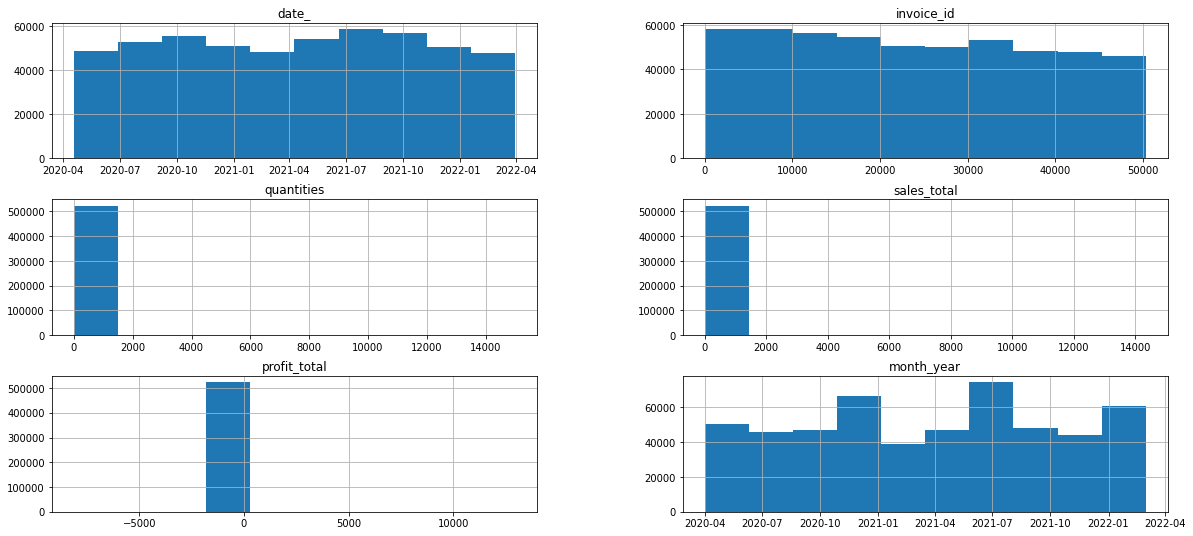

In [77]:
#data overView
data.hist(figsize=(20,9));

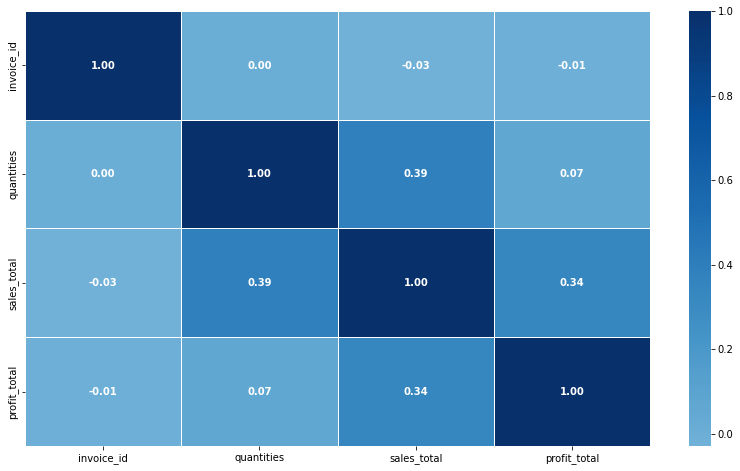

In [78]:
f,ax=plt.subplots(1,1,figsize=(14,8))
snb.heatmap(data.corr(),cmap='Blues',annot=True,annot_kws={'fontweight':'bold'},fmt='.2f',linewidths=.5,center=0);

- ### Let's answer our questions

<a id='q1'></a>
### Q1 - What is the highest, most and best selling group Manufacture ?

In [79]:
#Grouping the manufacturer informations
manufacture_sales = data.groupby(['manufacturer'],as_index=False).aggregate({'product':pd.Series.nunique, 'sales_total':np.sum ,'profit_total':np.sum, 'quantities' : np.sum}).sort_values(by = 'sales_total', ascending=False)
manufact = manufacture_sales.head(10)
manufact

,manufacturer,product,sales_total,profit_total,quantities
65,متنوع,897,"4,039,233.39","569,561.28","409,535.50"
16,بروكتر,292,"3,282,477.36","232,273.35",178832
63,ليفر,473,"2,101,247.96","185,989.33",175747
13,ايفا,197,"1,567,110.26","153,427.66",112907
64,ماسكو,20,"1,316,640.63","40,915.20",1610074
67,مستورد,454,"1,153,943.73","79,372.16",18990
2,اجهزة ومشتملاتها,140,"1,002,363.81","119,576.51",68898
46,فاتيكا,189,"895,694.28","94,993.20",90765
27,جونسون,180,"863,873.53","90,523.07",36908
68,مولفكس,85,"629,101.98","47,411.15",23441


In [80]:
#Top 10 manufacturers in total sales
manufacture_highest_sales = data.groupby('manufacturer').sales_total.sum().sort_values( ascending=False)
manufact_sales = manufacture_highest_sales[:10].sort_values(ascending=True)
manufact_sales.sort_values(ascending=False)

manufacturer
متنوع              4,039,233.39
بروكتر             3,282,477.36
ليفر               2,101,247.96
ايفا               1,567,110.26
ماسكو              1,316,640.63
مستورد             1,153,943.73
اجهزة ومشتملاتها   1,002,363.81
فاتيكا               895,694.28
جونسون               863,873.53
مولفكس               629,101.98
Name: sales_total, dtype: float64

In [81]:
#Top 10 manufacturers in total quantities sold
manufacture_most_sales = data.groupby('manufacturer').quantities.sum().sort_values( ascending=False)
manufact_qty = manufacture_most_sales[:10].sort_values(ascending=True)
manufact_qty.sort_values(ascending=False)

manufacturer
ماسكو        1610074
الدولية       431747
متنوع     409,535.50
سرنجات        196418
بروكتر        178832
ليفر          175747
ايفا          112907
تراي ام        94076
فاتيكا         90765
ميديكو         85455
Name: quantities, dtype: float64

In [82]:
#Top 10 manufacturers in profits
manufacture_best_sales = data.groupby('manufacturer').profit_total.sum().sort_values( ascending=False)
manufact_profit = manufacture_best_sales[:10].sort_values(ascending=True)
manufact_profit.sort_values(ascending=False)

manufacturer
متنوع              569,561.28
بروكتر             232,273.35
ليفر               185,989.33
ايفا               153,427.66
اجهزة ومشتملاتها   119,576.51
فاتيكا              94,993.20
جونسون              90,523.07
هنكل                86,009.03
مستورد              79,372.16
مستلزمات اطفال      69,689.69
Name: profit_total, dtype: float64

In [83]:
#Top 10 manufacturers in we have thier products 
products_in_each_manufacture = data.groupby('manufacturer').product.nunique().sort_values( ascending=False)
manufact_prod = products_in_each_manufacture[:10].sort_values(ascending=True)
manufact_prod.sort_values(ascending=False)

manufacturer
متنوع               897
ليفر                473
مستورد              454
بروكتر              292
احمد الشبراويشي     231
مستلزمات اطفال      227
ايفا                197
فاتيكا              189
جونسون              180
اجهزة ومشتملاتها    140
Name: product, dtype: int64

**Deep looking in the best of each manufacturer perspective**

In [84]:
#top 10 products in the highest selling manufacturer
highest_manufacturer_products =  data[data['manufacturer'] == "متنوع"].groupby('product').sales_total.sum().sort_values( ascending=False)[:10]
highest_manufacturer_products

product
حفاضات دراي بلس كبار سن /36قطعه سعر جديد   211,885.92
حفاضات كبار سن فاين بيزك 36قطعه            159,221.41
جوانتي لاتكس (L) كامل 100ق                 121,618.45
ماسك طبيب مغلف(50قطعه) باستيك ميلت بلون    111,055.17
بيروسول طائر 300 م                         103,705.08
سويت حرير مزيل شعر                          86,481.14
لاصق فئران كتاب /صغير                       66,182.15
جوانتي لاتكس (M) كامل 100ق                  64,735.65
بالمرز علبه عادي 150 م .                    60,382.37
لزقة النمر(الاصلية) 50قطعة                  54,090.18
Name: sales_total, dtype: float64

In [85]:
# top 10 products in the most quantities manufacturer
most_manufacturer_products = data[data['manufacturer'] == "ماسكو"].groupby('product').quantities.sum().sort_values( ascending=False)[:10]
most_manufacturer_products

product
سرنجات ماسكو 3سم كبار /150سرنجه لور لوك     548850
سرنجات ماسكو 5سم /120سرنجه                  290700
سرنجات ماسكو 3سم كبار /150سرنجه لوك         287100
سرنجات ماسكو 3سم اطفال/150سرنجه لوك         146400
سرنجات ماسكو3سم اطفال/150سرنجه لور لوك      112650
سرنجات ماسكو انسولين (250سرنجه) /100 وحده    88448
جهاز محلول ماسكو 50 قطعه                     32089
سرنجات ماسكو 10سم /80قطعه                    29473
50 /سرنجات ماسكو دواء اطفال اشكال            17352
شاش فازلين ديرماتول 10*10 /50قطعة            11719
Name: quantities, dtype: float64

In [86]:
#top 10 products in the best profits manufacturer
best_manufacturer_products =  data[data['manufacturer'] == "متنوع"].groupby('product').profit_total.sum().sort_values( ascending=False)[:10]
best_manufacturer_products

product
لاصق فئران كتاب /صغير                      16,996.96
جوانتي لاتكس (L) كامل 100ق                 12,964.79
حفاضات كبار سن فاين بيزك 36قطعه            11,478.62
مرهم اسود مرهم اكتيول                      11,233.84
حفاضات دراي بلس كبار سن /36قطعه سعر جديد    8,961.30
قطن اذن خشب كبير                            8,897.67
ماسك نيوبليزر كبار                          8,393.66
سويت حرير مزيل شعر                          7,897.33
بيروسول طائر 300 م                          7,390.03
ماسك نيوبليزر اطفال                         7,351.51
Name: profit_total, dtype: float64

- **The highest selling manufacturer is "متنوع" with 3.3mil pound**
- 'ماسكو' manufacturer has a really small percentage of profits compared to the large quantities that were sold

*****

<a id='q2'></a>
### Q2 - What is the highest, most and best selling group category ?

In [87]:
#Categories group data
category_sales = data.groupby(['category'],as_index=False).aggregate({'product':pd.Series.nunique, 'sales_total':np.sum ,'profit_total':np.sum, 'quantities' : np.sum}).sort_values(by = 'sales_total', ascending=False)
category_sales

,category,product,sales_total,profit_total,quantities
1,اكسسوار,3895,"14,657,470.47","1,616,290.32",1062978
3,مستلزمات,920,"6,883,484.38","797,180.77","2,926,029.56"
4,ورقيات,386,"5,139,016.52","378,744.19",346927
0,N/A,26,"33,202.81","4,332.30",1904
2,سيرم للبشرة,1,"10,160.87","1,809.16",109


In [88]:
#Highest sales category.
category_highest_sales = data.groupby('category').sales_total.sum()
category_highest_sales

category
N/A               33,202.81
اكسسوار       14,657,470.47
سيرم للبشرة       10,160.87
مستلزمات       6,883,484.38
ورقيات         5,139,016.52
Name: sales_total, dtype: float64

In [89]:
#Most selling category.
category_most_sales = data.groupby('category').quantities.sum()
category_most_sales

category
N/A                   1904
اكسسوار            1062978
سيرم للبشرة            109
مستلزمات      2,926,029.56
ورقيات              346927
Name: quantities, dtype: float64

In [90]:
#Best profits category.
category_best_sales = data.groupby('category').profit_total.sum()
category_best_sales

category
N/A               4,332.30
اكسسوار       1,616,290.32
سيرم للبشرة       1,809.16
مستلزمات        797,180.77
ورقيات          378,744.19
Name: profit_total, dtype: float64

In [91]:
#Category with most products.
products_in_each_category = data.groupby('category').product.nunique()
products_in_each_category

category
N/A              26
اكسسوار        3895
سيرم للبشرة       1
مستلزمات        920
ورقيات          386
Name: product, dtype: int64

**Deep looking in the best of each category perspective**

In [92]:
#top 10 products in the highest sales category
best_category_products =  data[data['category'] == "اكسسوار"].groupby('product').sales_total.sum().sort_values( ascending=False)[:10]
best_category_products

product
وان بمبي (حساس) 40 مل  صغير           144,647.38
زيت برهان (تكثيف الشعر) احمر الصفيح   113,485.12
1-2-3 فرشة اسنان اورال بي             110,031.54
جيليت ماكينه حلاقه /حريمي             109,883.73
بيندولين شامبو اطفال 250مل            107,534.52
بيروسول طائر 300 م                    103,705.08
بيندولين شامبو اطفال 450مل             94,848.29
زيت برهان (فرد الشعر)ازرق الصفيح       87,388.68
سويت حرير مزيل شعر                     86,481.14
ريد طائر 300م /بدون رائحه              85,704.88
Name: sales_total, dtype: float64

In [93]:
# top 10 products in the most quantities category
most_category_products = data[data['category'] == "اكسسوار"].groupby('product').quantities.sum().sort_values( ascending=False)[:10]
most_category_products

product
سيجنال 25مل صغير خصم 1 جنيه                      22276
سويت حرير مزيل شعر                               20892
ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد   17426
وان بمبي (حساس) 40 مل  صغير                      15132
1-2-3 فرشة اسنان اورال بي                        14915
ايزي سويت  قطع                                   12811
سيجنال 25 مل صغير                                11698
سيجنال 50 مل وسط 15% خصم                         11330
حلمه ببرونه الجو                                 11094
ايفا جلسرين كريم بشرة 20م/صغير                   10951
Name: quantities, dtype: float64

In [94]:
#top 10 products in the best profits category
best_category_products =  data[data['category'] == "اكسسوار"].groupby('product').profit_total.sum().sort_values( ascending=False)[:10]
best_category_products

product
1-2-3 فرشة اسنان اورال بي                        18,752.17
لاصق فئران كتاب /صغير                            16,996.96
جيليت ماكينه حلاقه /حريمي                        15,860.19
*************                                    13,392.67
فيبكس اكياس /اخضر                                12,305.56
وان بمبي (حساس) 40 مل  صغير                      12,028.99
جلات كريم فرد شعر /كبير                          10,763.24
ايزي سويت عرض 3 قطع/عسل نحل-ورد-زيتون سعر جديد   10,515.34
نيفيا كريم صغير 30جم                             10,150.34
بوناويل اكياس حمام كريم /قمح                      9,156.71
Name: profit_total, dtype: float64

- **The highest selling categoryis "اكسسوار" with 14.66mil pound**.
- " ** * ** * ** * ** * "  is one of top 10 products in the best profits and its name is miss leading.
- **The lowest profit rate - compared to total sales - achieved by "ورقيات" category (7%).

****

<a id='q3'></a>
### Q3 - What is the highest, most and best selling group subcategory ?

In [95]:
#Subcagories group data
subcategory_sales = data.groupby(['subcategory'],as_index=False).aggregate({'product':pd.Series.nunique, 'sales_total':np.sum ,'profit_total':np.sum, 'quantities' : np.sum}).sort_values(by = 'sales_total', ascending=False)
top_subcategory_sales = subcategory_sales[:10]
top_subcategory_sales

,subcategory,product,sales_total,profit_total,quantities
39,حفاضات نسائية,131,"2,489,624.27","185,133.22",192427
38,حفاضات,151,"2,224,486.27","123,585.94",24582
0,N/A,851,"2,008,567.21","294,028.86",158970
56,سرنجات,27,"1,513,385.52","65,536.02",2151838
128,معجون اسنان,151,"1,480,833.69","132,787.67",133881
65,شامبو,436,"1,289,682.17","120,406.49",40820
54,زيت شعر,157,"1,138,126.72","94,723.88",71201
125,مزيل عرق,328,"970,005.27","106,530.25",46106
121,مبيدات,57,"931,963.38","90,111.42",55254
105,كريم شعر,205,"913,202.95","85,862.92",62115


In [96]:
#Subcategories profits rate
top_subcategory_sales['grosses'] = top_subcategory_sales['profit_total']/top_subcategory_sales['sales_total']*100
top_subcategory_sales.sort_values(by = 'grosses', ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,subcategory,product,sales_total,profit_total,quantities,grosses
0,N/A,851,"2,008,567.21","294,028.86",158970,14.64
125,مزيل عرق,328,"970,005.27","106,530.25",46106,10.98
121,مبيدات,57,"931,963.38","90,111.42",55254,9.67
105,كريم شعر,205,"913,202.95","85,862.92",62115,9.40
65,شامبو,436,"1,289,682.17","120,406.49",40820,9.34
128,معجون اسنان,151,"1,480,833.69","132,787.67",133881,8.97
54,زيت شعر,157,"1,138,126.72","94,723.88",71201,8.32
39,حفاضات نسائية,131,"2,489,624.27","185,133.22",192427,7.44
38,حفاضات,151,"2,224,486.27","123,585.94",24582,5.56
56,سرنجات,27,"1,513,385.52","65,536.02",2151838,4.33


In [97]:
#Hightest sales subcategory.
subcategory_highest_sales = data.groupby('subcategory').sales_total.sum().sort_values( ascending=False)
subcateg_sales = subcategory_highest_sales[:10].sort_values(ascending=True)
subcateg_sales.sort_values(ascending=False)

subcategory
حفاضات نسائية   2,489,624.27
حفاضات          2,224,486.27
N/A             2,008,567.21
سرنجات          1,513,385.52
معجون اسنان     1,480,833.69
شامبو           1,289,682.17
زيت شعر         1,138,126.72
مزيل عرق          970,005.27
مبيدات            931,963.38
كريم شعر          913,202.95
Name: sales_total, dtype: float64

In [98]:
#Most selling subcategory.
subcategory_most_sales = data.groupby('subcategory').quantities.sum().sort_values( ascending=False)
subcateg_qty = subcategory_most_sales[:10].sort_values(ascending=True)
subcateg_qty.sort_values(ascending=False)

subcategory
سرنجات          2151838
حفاضات نسائية    192427
N/A              158970
معجون اسنان      133881
مناديل           131916
دريسينج          125246
ازالة شعر        101950
شاش               93605
تركيبات           87509
زيت شعر           71201
Name: quantities, dtype: float64

In [99]:
#Best profits subcategory.
subcategory_best_sales = data.groupby('subcategory').profit_total.sum().sort_values( ascending=False)
subcateg_profit = subcategory_best_sales[:10].sort_values(ascending=True)
subcateg_profit.sort_values(ascending=False)

subcategory
N/A             294,028.86
حفاضات نسائية   185,133.22
معجون اسنان     132,787.67
حفاضات          123,585.94
شامبو           120,406.49
مزيل عرق        106,530.25
زيت شعر          94,723.88
ازالة شعر        94,542.94
تركيبات          90,190.51
مبيدات           90,111.42
Name: profit_total, dtype: float64

In [100]:
#Subcategory with most products.
products_in_each_subcategory = data.groupby('subcategory').product.nunique().sort_values( ascending=False)
subcateg_prod = products_in_each_subcategory[:10].sort_values(ascending=True)
subcateg_prod.sort_values(ascending=False)

subcategory
N/A              851
شامبو            436
مزيل عرق         328
برفان            239
كريم شعر         205
زيت شعر          157
حفاضات           151
معجون اسنان      151
بلسم             149
حفاضات نسائية    131
Name: product, dtype: int64

**Deep looking in the best of each subcategory perspective**

In [101]:
#top subcateory (حفاضات نسائية) best Sales products.
highest_subcategory_products =  data[data['subcategory'] == "حفاضات نسائية"].groupby('product').sales_total.sum().sort_values( ascending=False)[:10]
highest_subcategory_products

product
اولويز دوبل ليلي 10%خصم16ق                 284,096.22
اولويز ليلي (طويل جدا 10)%خصم16ق           179,991.82
سندريلا كبير /موف40قطعة                    175,708.45
اولويز كبير 10%خصم16ق                      135,984.36
اولويز ليلي طويل جدا دوبل 16ق / 20 جمهور   116,741.53
اولويز ليلي طويل جدا دوبل 16ق              114,350.81
اولويز دوبل كبير 10%خصم16ق                  95,798.86
اولويز حساس دوبل طويل 16 ق                  86,788.10
اولويز حساس  16ق طويل                       82,437.98
اولويز دوبل الترا ازرق/طويل جدا8ق           81,611.40
Name: sales_total, dtype: float64

In [102]:
#top subcateory (سرنجات) most sold products.
most_subcategory_products = data[data['subcategory'] == "سرنجات"].groupby('product').quantities.sum().sort_values( ascending=False)[:10]
most_subcategory_products

product
سرنجات ماسكو 3سم كبار /150سرنجه لور لوك     548850
سرنجات ماسكو 5سم /120سرنجه                  290700
سرنجات ماسكو 3سم كبار /150سرنجه لوك         287100
سرنجات الدوليه 3سم كبار/250سرنجة            262341
سرنجات ماسكو 3سم اطفال/150سرنجه لوك         146400
سرنجات كوري انسولين /10سرنجه                127384
سرنجات ماسكو3سم اطفال/150سرنجه لور لوك      112650
سرنجات الدوليه 5سم /200 سرنجه                93424
سرنجات ماسكو انسولين (250سرنجه) /100 وحده    88448
سرنجات الدوليه 3سم اطفال /250سرنجه           55000
Name: quantities, dtype: float64

In [103]:
#top subcateory (حفاضات نسائية) best profits products.
best_subcategory_products =  data[data['subcategory'] == "حفاضات نسائية"].groupby('product').profit_total.sum().sort_values( ascending=False)[:10]
best_subcategory_products

product
سندريلا كبير /موف40قطعة             13,052.82
اولويز دوبل ليلي 10%خصم16ق          12,957.01
اولويز دوبل الترا ازرق/طويل جدا8ق    9,413.10
اولويز ليلي (طويل جدا 10)%خصم16ق     8,991.95
اولويز حساس دوبل طويل جدا 16 ق       7,926.52
اولويز كبير 10%خصم16ق                7,847.75
اولويز ليلي طويل جدا دوبل 16ق        7,784.63
اولويز حساس دوبل طويل 16 ق           7,733.06
سوفي  دوبل كبير 16حفاضه /16قطعة      7,149.71
اولويز الترا ازرق/طويل جدا 16ق       5,892.68
Name: profit_total, dtype: float64

**Exploring the the highest subcategory manufacturers**

In [104]:
#Exploring total sales for subcateory (حفاضات نسائية) Manufacturers.
highest_manufacturer_sales_highest_subcategory =  data[data['subcategory'] == "حفاضات نسائية"].groupby('manufacturer').sales_total.sum().sort_values( ascending=False)[:10]
highest_manufacturer_sales_highest_subcategory

manufacturer
بروكتر    1,782,813.47
سوفي        232,724.17
سندريلا     186,397.90
برايفت      139,902.33
متنوع        77,813.86
جونسون       60,285.89
قنديل         5,283.20
مولفكس        2,592.53
N/A           1,810.93
Name: sales_total, dtype: float64

In [105]:
#Exploring total sales for subcateory (شامبو) Manufacturers.
manufacturer_subcategory_most_products =  data[data['subcategory'] == "شامبو"].groupby('manufacturer').sales_total.sum().sort_values( ascending=False)[:10]
manufacturer_subcategory_most_products

manufacturer
ليفر       297,354.46
بيندولين   241,821.03
جونسون     209,078.78
بروكتر     185,741.18
مستورد     158,754.39
سباركل      76,868.51
لوريال      43,478.16
فاتيكا      24,751.11
سانوسان     21,460.01
لونا         8,674.91
Name: sales_total, dtype: float64

In [106]:
#Exploring Manufacturers for subcateory (حفاضات).
manufacturer_subcategory_second_most_products =  data[data['subcategory'] == "حفاضات"].groupby('manufacturer').sales_total.sum().sort_values( ascending=False)[:10]
manufacturer_subcategory_second_most_products

manufacturer
بروكتر     867,466.00
متنوع      523,211.72
مولفكس     497,197.06
بيبي جوي   272,723.11
فاين        32,758.27
برايفت      15,923.53
سوفي        14,543.11
N/A            663.48
Name: sales_total, dtype: float64

In [107]:
#Exploring profits for subcateory (حفاضات نسائية) Manufacturers.
highest_subcategory_manufacturer =  data[data['subcategory'] == "حفاضات نسائية"].groupby('manufacturer').profit_total.sum().sort_values( ascending=False)[:10]
highest_subcategory_manufacturer

manufacturer
بروكتر    112,347.99
سوفي       20,194.59
برايفت     19,412.14
سندريلا    13,861.03
جونسون      9,435.99
متنوع       9,048.29
قنديل         440.47
N/A           312.18
مولفكس         80.53
Name: profit_total, dtype: float64

In [108]:
#Exploring subcateory (شامبو) Manufacturers.
best_subcategory_manufacturer =  data[data['subcategory'] == "شامبو"].groupby('manufacturer').profit_total.sum().sort_values( ascending=False)[:10]
best_subcategory_manufacturer

manufacturer
ليفر       28,137.57
بروكتر     24,978.88
جونسون     19,502.21
بيندولين   19,203.52
سباركل     11,417.92
مستورد      5,760.35
لوريال      3,262.88
فاتيكا      2,706.20
سانوسان     1,799.88
متنوع       1,147.88
Name: profit_total, dtype: float64

In [109]:
#Exploring Manufacturers for subcateory (حفاضات).
bes_subcategory_manufacturer =  data[data['subcategory'] == "حفاضات"].groupby('manufacturer').profit_total.sum().sort_values( ascending=False)[:10]
bes_subcategory_manufacturer

manufacturer
متنوع      33,297.06
بروكتر     31,429.09
مولفكس     29,392.21
بيبي جوي   21,471.15
برايفت      2,955.40
فاين        2,688.08
سوفي        2,285.46
N/A            67.48
Name: profit_total, dtype: float64

- **The highest selling subcategory is "حفاضات نسائية" with 2.49mil pound**.
- There is 851 products aren't included to any subcategory
- **'سرنجات ماسكو 3سم كبار /150سرنجه لور لوك'** has a huge amount of selling quantities and not among the top 10 profits or sales.
- Manufacturer **(بروكتور)** products in the categories **(شامبو)**, **(حفاضات نسائية)** and **(حفاضات)** have been able to earn the trust of our customers..
- It is recommended for subcategory **(حفاضات نسائية)** to increase the demand from manufacturer **(برايفت)** more than **(سندريلا)** because the profit rate is greater than **(سندريلا)**.

****

<a id='q4'></a>
### Q4 - What is the highest, most and best selling group area ?

In [110]:
#Locations group data
locations_sales = data.groupby(['location'],as_index=False).aggregate({'client':pd.Series.nunique, 'invoice_id':pd.Series.nunique,'sales_total':np.sum ,'profit_total':np.sum}).sort_values('client', ascending=False)
locations_sales.head(10)

,location,client,invoice_id,sales_total,profit_total
0,N/A,110,3219,"1,841,757.21","109,276.22"
64,Region171,44,1651,"952,358.84","100,646.57"
31,Region11439,36,2143,"759,460.83","82,382.74"
72,Region1850,33,1133,"631,266.02","56,109.90"
2,Region1-43,26,1309,"787,733.36","87,376.63"
32,Region11458,25,1079,"604,867.44","69,459.37"
73,Region1869,24,1143,"624,512.96","67,442.43"
44,Region1318,24,1215,"521,924.81","61,371.02"
41,Region1242,23,1335,"755,489.60","81,766.91"
1,Region1-24,23,1349,"1,043,752.21","116,996.94"


In [111]:
#Highest sales location
location_highest_sales = data.groupby('location').sales_total.sum().sort_values( ascending=False)
location_sales = location_highest_sales[:10].sort_values(ascending=True)
location_sales.sort_values(ascending=False)

location
N/A           1,841,757.21
Region1147    1,516,978.33
Region1-24    1,043,752.21
Region1-62    1,019,085.86
Region171       952,358.84
Region11059     929,325.27
Region1584      867,954.03
Region1831      861,844.04
Region133       860,542.87
Region11097     800,970.52
Name: sales_total, dtype: float64

In [112]:
#Best profits locations
location_best_sales = data.groupby('location').profit_total.sum().sort_values( ascending=False)
location_profit = location_best_sales[:10].sort_values(ascending=True)
location_profit.sort_values(ascending=False)

location
Region1147    165,703.62
Region1-24    116,996.94
Region1-62    111,217.13
N/A           109,276.22
Region171     100,646.57
Region1831     95,177.90
Region133      94,114.13
Region1584     94,091.34
Region11059    88,253.64
Region1-43     87,376.63
Name: profit_total, dtype: float64

In [113]:
#Locations with most invoices number
location_most_invoices = data.groupby('location').invoice_id.nunique().sort_values( ascending=False)
location_invoices = location_most_invoices[:10].sort_values(ascending=True)
location_invoices.sort_values(ascending=False)

location
N/A            3219
Region133      2407
Region11439    2143
Region1147     2124
Region11059    1739
Region171      1651
Region1584     1599
Region1831     1549
Region1-81     1415
Region1-24     1349
Name: invoice_id, dtype: int64

In [114]:
#Locations with most clients
location_most_clients = data.groupby('location').client.nunique().sort_values( ascending=False)
location_clients = location_most_clients[:10].sort_values(ascending=True)
location_clients.sort_values(ascending=False)

location
N/A            110
Region171       44
Region11439     36
Region1850      33
Region1-43      26
Region11458     25
Region1869      24
Region1318      24
Region1242      23
Region1-24      23
Name: client, dtype: int64

**Deep looking in the best of each location perspective**

In [115]:
#top 10 clients in the hightest sales location
hightest_sales_location_products =  data[data['location'] == "Region1147"].groupby('client').sales_total.sum().sort_values( ascending=False)[:10]
hightest_sales_location_products

client
clint2133   957,778.29
clint2148   529,987.00
clint2142    17,283.29
clint2144     6,967.21
clint2754     4,962.54
Name: sales_total, dtype: float64

In [116]:
#top clients in the best profit location
best_profit_location_products =  data[data['location'] == "Region1147"].groupby('client').profit_total.sum().sort_values( ascending=False)[:10]
best_profit_location_products

client
clint2133   104,548.03
clint2148    58,204.58
clint2142     1,705.70
clint2144     1,021.14
clint2754       224.16
Name: profit_total, dtype: float64

In [117]:
#top 10 clients in location with most clients
best_profit_location_clients =  data[data['location'] == "Region171"].groupby('client').invoice_id.nunique().sort_values( ascending=False)[:10]
best_profit_location_clients

client
clint1417    246
clint2525    236
clint1430    139
clint1423    122
clint1442    119
clint1429    119
clint1416    109
clint1441     72
clint1459     58
clint1458     33
Name: invoice_id, dtype: int64

- There is 1.8mil pound total sales to clients with missing location.
- Our best area is **"Region1147"** with 1.5mil pound total sales .. and the best customer in It is "clint2133".
- There are 100k profits that came from clients with we didn't know thier locations.

*****

<a id='q5'></a>
### Q5 - What is the highest, most and best selling group product ?

In [118]:
#Grouping products data 
products_sales = data.groupby(['product'],as_index=False).aggregate({'quantities':np.sum ,'sales_total':np.sum ,'profit_total':np.sum}).sort_values('sales_total', ascending=False)
products_sales.head(10)

,product,quantities,sales_total,profit_total
2538,سرنجات ماسكو 3سم كبار /150سرنجه لور لوك,548850,"345,547.05","1,128.72"
399,اولويز دوبل ليلي 10%خصم16ق,15087,"284,096.22","12,957.01"
2540,سرنجات ماسكو 5سم /120سرنجه,290700,"223,002.77",-79.90
751,بامبرز كبير جدا مقاس58/5قطعه,1523,"221,005.66","4,162.90"
1891,حفاضات دراي بلس كبار سن /36قطعه سعر جديد,1237,"211,885.92","8,961.30"
4505,مناديل زينه 550 سعر جديد,19679,"198,374.02","19,513.17"
2539,سرنجات ماسكو 3سم كبار /150سرنجه لوك,287100,"187,340.65","4,360.95"
419,اولويز ليلي (طويل جدا 10)%خصم16ق,17920,"179,991.82","8,991.95"
2618,سندريلا كبير /موف40قطعة,24304,"175,708.45","13,052.82"
753,بامبرز كبيرمقاس 4 /58قطعة,1211,"161,417.31","3,192.33"


In [119]:
#Highest sales products.
product_highest_sales = data.groupby('product').sales_total.sum().sort_values( ascending=False)
product_sales = product_highest_sales[:10].sort_values(ascending=True)
product_sales.sort_values(ascending=False)

product
سرنجات ماسكو 3سم كبار /150سرنجه لور لوك    345,547.05
اولويز دوبل ليلي 10%خصم16ق                 284,096.22
سرنجات ماسكو 5سم /120سرنجه                 223,002.77
بامبرز كبير جدا مقاس58/5قطعه               221,005.66
حفاضات دراي بلس كبار سن /36قطعه سعر جديد   211,885.92
مناديل زينه 550 سعر جديد                   198,374.02
سرنجات ماسكو 3سم كبار /150سرنجه لوك        187,340.65
اولويز ليلي (طويل جدا 10)%خصم16ق           179,991.82
سندريلا كبير /موف40قطعة                    175,708.45
بامبرز كبيرمقاس 4 /58قطعة                  161,417.31
Name: sales_total, dtype: float64

In [120]:
#Most selling product.
product_most_sales = data.groupby('product').quantities.sum().sort_values( ascending=False)
product_qty = product_most_sales[:10].sort_values(ascending=True)
product_qty.sort_values(ascending=False)

product
سرنجات ماسكو 3سم كبار /150سرنجه لور لوك     548850
سرنجات ماسكو 5سم /120سرنجه                  290700
سرنجات ماسكو 3سم كبار /150سرنجه لوك         287100
سرنجات الدوليه 3سم كبار/250سرنجة            262341
سرنجات ماسكو 3سم اطفال/150سرنجه لوك         146400
سرنجات كوري انسولين /10سرنجه                127384
سرنجات ماسكو3سم اطفال/150سرنجه لور لوك      112650
سرنجات الدوليه 5سم /200 سرنجه                93424
سرنجات ماسكو انسولين (250سرنجه) /100 وحده    88448
سرنجات الدوليه 3سم اطفال /250سرنجه           55000
Name: quantities, dtype: float64

In [121]:
#Best profits product.
product_best_sales = data.groupby('product').profit_total.sum().sort_values( ascending=False)
product_profit = product_best_sales[:10].sort_values(ascending=True)
product_profit.sort_values(ascending=False)

product
ترمومتر ديجيتال                    27,270.58
100 /سرنجات دواء اطفال بابلز 5سم   20,567.81
مناديل زينه 550 سعر جديد           19,513.17
1-2-3 فرشة اسنان اورال بي          18,752.17
لاصق فئران كتاب /صغير              16,996.96
دريسينج تراي ام 15*25 /10 ق        16,074.06
جيليت ماكينه حلاقه /حريمي          15,860.19
شريط تحليل فاست بيبي تشيك /جهاز    14,857.54
*************                      13,392.67
سندريلا كبير /موف40قطعة            13,052.82
Name: profit_total, dtype: float64

**Deep looking in the best of each product perspective**

In [122]:
#top 10 clients in the hightest sales product
clients_and_top_product =  data[data['product'] == "سرنجات ماسكو 3سم كبار /150سرنجه لور لوك"].groupby('client').sales_total.sum().sort_values( ascending=False)[:10]
clients_and_top_product

client
clint2133   19,972.27
clint2700   12,358.49
clint1145   11,351.28
clint1897   10,896.31
clint1710   10,801.58
clint2850   10,577.85
clint396     9,212.55
clint1160    9,117.09
clint1388    9,007.16
clint1414    8,943.07
Name: sales_total, dtype: float64

In [123]:
#top 10 locations in the hightest sales product
location_and_top_product =  data[data['product'] == "سرنجات ماسكو 3سم كبار /150سرنجه لور لوك"].groupby('location').sales_total.sum().sort_values( ascending=False)[:10]
location_and_top_product

location
Region1147    25,875.90
Region11097   24,166.17
Region1375    20,289.21
Region1242    19,002.73
Region171     18,790.94
Region1-43    16,292.85
N/A           16,089.00
Region1831    13,172.83
Region11040   13,061.67
Region133     10,859.93
Name: sales_total, dtype: float64

In [124]:
#top 10 clients in the best profits sales product
clients_and_best_product =  data[data['product'] == "ترمومتر ديجيتال"].groupby('client').profit_total.sum().sort_values( ascending=False)[:10]
clients_and_best_product

client
clint2133   1,093.73
clint1382     762.46
clint2148     727.67
clint938      648.37
clint346      611.47
clint591      542.30
clint268      499.04
clint269      498.71
clint542      494.80
clint1271     492.64
Name: profit_total, dtype: float64

In [125]:
#top 10 clients in the hightest sales product
location_and_best_product =  data[data['product'] == "ترمومتر ديجيتال"].groupby('location').profit_total.sum().sort_values( ascending=False)[:10]
location_and_best_product

location
Region1147    1,837.20
Region1-62    1,768.27
Region1-43    1,416.22
Region1242    1,390.23
Region1584    1,312.65
Region171     1,185.06
Region1-24    1,078.13
Region11439   1,025.13
Region11097     950.55
Region1318      907.28
Name: profit_total, dtype: float64

- (السرنجات) sales should not be judged by the amount sold, but by sales and profits only.. because it is clear that their sales are recorded in one syringe and not in the package which contains 250 syringes.
- The best profits product is not among the top 10 products in total sales.

****

<a id='q6'></a>
### Q6 - What is the highest, most and best selling group client ?

In [126]:
#Grouping clients data.
clients_sales = data.groupby(['client'],as_index=False).aggregate({'invoice_id':pd.Series.nunique, 'sales_total':np.sum ,'profit_total':np.sum}).sort_values(by = 'sales_total', ascending=False)
top_clients_sales = clients_sales[:10]
top_clients_sales

,client,invoice_id,sales_total,profit_total
331,clint2133,1118,"957,778.29","104,548.03"
415,clint2489,423,"720,553.32","2,328.00"
339,clint2163,1054,"593,163.71","59,771.83"
797,clint542,368,"542,038.31","62,080.77"
334,clint2148,896,"529,987.00","58,204.58"
124,clint1382,1002,"448,429.82","50,822.01"
216,clint1710,723,"388,956.37","39,507.03"
591,clint269,334,"367,101.97","39,968.84"
411,clint246,511,"346,266.85","36,666.16"
875,clint938,623,"341,077.43","37,745.60"


In [127]:
top_clients_sales['grosses'] = top_clients_sales['profit_total']/top_clients_sales['sales_total']*100
top_clients_sales.sort_values(by = 'sales_total', ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,client,invoice_id,sales_total,profit_total,grosses
331,clint2133,1118,"957,778.29","104,548.03",10.92
415,clint2489,423,"720,553.32","2,328.00",0.32
339,clint2163,1054,"593,163.71","59,771.83",10.08
797,clint542,368,"542,038.31","62,080.77",11.45
334,clint2148,896,"529,987.00","58,204.58",10.98
124,clint1382,1002,"448,429.82","50,822.01",11.33
216,clint1710,723,"388,956.37","39,507.03",10.16
591,clint269,334,"367,101.97","39,968.84",10.89
411,clint246,511,"346,266.85","36,666.16",10.59
875,clint938,623,"341,077.43","37,745.60",11.07


In [128]:
#Highest sales clients
client_highest_sales = data.groupby('client').sales_total.sum().sort_values( ascending=False)
client_sales = client_highest_sales[:10].sort_values(ascending=True)
client_sales.sort_values(ascending=False)

client
clint2133   957,778.29
clint2489   720,553.32
clint2163   593,163.71
clint542    542,038.31
clint2148   529,987.00
clint1382   448,429.82
clint1710   388,956.37
clint269    367,101.97
clint246    346,266.85
clint938    341,077.43
Name: sales_total, dtype: float64

In [129]:
#Best profits clients
client_best_sales = data.groupby('client').profit_total.sum().sort_values( ascending=False)
client_profit = client_best_sales[:10].sort_values(ascending=True)
client_profit.sort_values(ascending=False)

client
clint2133   104,548.03
clint542     62,080.77
clint2163    59,771.83
clint2148    58,204.58
clint419     55,382.85
clint1382    50,822.01
clint269     39,968.84
clint1710    39,507.03
clint938     37,745.60
clint246     36,666.16
Name: profit_total, dtype: float64

In [130]:
#Clients with most Incoives
client_most_invoices = data.groupby('client').invoice_id.nunique().sort_values( ascending=False)
client_invoices = client_most_invoices[:10].sort_values(ascending=True)
client_invoices.sort_values(ascending=False)

client
clint2133    1118
clint2163    1054
clint1382    1002
clint2148     896
clint241      810
clint1710     723
clint2494     680
clint1253     672
clint1595     631
clint938      623
Name: invoice_id, dtype: int64

**Deep looking in the best of each client perspective**

In [131]:
#Products of the best client.
highest_sales_client_products =  data[data['client'] == "clint2133"].groupby('product').sales_total.sum().sort_values( ascending=False)[:20]
highest_sales_client_products

product
سرنجات ماسكو 3سم كبار /150سرنجه لور لوك       19,972.27
حفاضات كبار سن فاين بيزك 36قطعه               15,994.16
بامبرز كبير جدا مقاس58/5قطعه                  15,437.44
بامبرز كبيرمقاس 4 /58قطعة                     12,541.88
بامبرز صغيرمقاس 2 /60قطعه                     12,041.03
اولويز دوبل ليلي 10%خصم16ق                    10,140.65
بامبرز وسط مقاس3 /58قطعه                       9,886.21
بيبي جوي كبير مقاس4 /58حفاضة مضغوط سعر جديد    9,733.78
بيبي جوي كبير جدا مقاس5 /                      9,425.69
ريد سائل غيار                                  8,559.76
سرنجات ماسكو 5سم /120سرنجه                     8,432.87
بامبرز كبير جدا جدا م6 (48ق)                   8,224.53
1-2-3 فرشة اسنان اورال بي                      7,852.11
سرنجات ماسكو 3سم كبار /150سرنجه لوك            7,421.35
اولويز ليلي (طويل جدا 10)%خصم16ق               7,126.82
100 /سرنجات دواء اطفال بابلز 5سم               6,406.54
سندريلا كبير /موف40قطعة                        6,245.14
شرائط سكر بايونيم جي اس 100 /50شريط     

- The man who made the show is **"clint2133"** with 958k sales , 105k profits and 1118 invoices

****

<a id='q7'></a>
### Q7 - What is the highest, most and best selling month ?

In [132]:
#Grouping monhtly data.
monthly_sales = data.groupby(['month_year'],as_index=False).aggregate({'quantities':np.sum ,'sales_total':np.sum ,'profit_total':np.sum, 'invoice_id':pd.Series.nunique}).sort_values('sales_total', ascending=False)
monthly_sales

,month_year,quantities,sales_total,profit_total,invoice_id
1,2020-05-01,"179,394.90","1,327,458.65","132,750.05",1590
3,2020-07-01,"196,437.50","1,291,834.57","123,914.58",1962
13,2021-05-01,"191,545.55","1,264,730.08","143,397.98",2401
23,2022-03-01,"251,157.20","1,259,172.44","125,652.62",2115
6,2020-10-01,"200,776.10","1,256,503.22","142,604.28",1943
2,2020-06-01,"172,256.55","1,253,900.56","139,971.92",1814
16,2021-08-01,"216,663.50","1,249,267.74","134,277.98",2529
7,2020-11-01,"186,215.60","1,217,870.61","118,381.77",1874
15,2021-07-01,"194,276.75","1,203,199.74","135,139.37",2258
17,2021-09-01,"199,755.50","1,147,100.35","122,982.94",2336


In [133]:
#Monthly Sales
month_highest_sales = data.groupby('month_year').sales_total.sum().sort_values( ascending=False)
month_sales = month_highest_sales[:10].sort_values(ascending=True)
month_sales.sort_values(ascending=False)

month_year
2020-05-01   1,327,458.65
2020-07-01   1,291,834.57
2021-05-01   1,264,730.08
2022-03-01   1,259,172.44
2020-10-01   1,256,503.22
2020-06-01   1,253,900.56
2021-08-01   1,249,267.74
2020-11-01   1,217,870.61
2021-07-01   1,203,199.74
2021-09-01   1,147,100.35
Name: sales_total, dtype: float64

In [134]:
#Monthly quantities
month_highest_qty = data.groupby('month_year').quantities.sum().sort_values( ascending=False)
month_qty = month_highest_qty[:10].sort_values(ascending=True)
month_qty.sort_values(ascending=False)

month_year
2022-03-01   251,157.20
2021-08-01   216,663.50
2020-10-01   200,776.10
2021-09-01   199,755.50
2021-11-01   196,628.75
2020-07-01   196,437.50
2021-07-01   194,276.75
2021-05-01   191,545.55
2022-01-01   188,711.50
2020-09-01   187,121.50
Name: quantities, dtype: float64

In [135]:
#Monthly profits
month_highest_profit = data.groupby('month_year').profit_total.sum().sort_values( ascending=False)
month_profit = month_highest_profit[:10].sort_values(ascending=True)
month_profit.sort_values(ascending=False)

month_year
2021-05-01   143,397.98
2020-10-01   142,604.28
2020-06-01   139,971.92
2021-07-01   135,139.37
2021-08-01   134,277.98
2020-05-01   132,750.05
2021-06-01   129,488.06
2022-03-01   125,652.62
2020-07-01   123,914.58
2021-10-01   123,105.46
Name: profit_total, dtype: float64

In [136]:
#Monthly invoices
invoices_per_month = data.groupby('month_year').invoice_id.nunique().sort_values( ascending=False)
month_invoice = invoices_per_month[:10].sort_values(ascending=True)
month_invoice.sort_values(ascending=False)

month_year
2021-08-01    2529
2021-05-01    2401
2021-10-01    2389
2021-09-01    2336
2021-07-01    2258
2021-11-01    2240
2021-06-01    2216
2022-01-01    2215
2021-12-01    2180
2022-03-01    2115
Name: invoice_id, dtype: int64

**Deep looking in the Monthly report**

In [137]:
mean_monthly_bills = data.groupby('month_year').invoice_id.nunique().mean()
mean_monthly_sales = data.groupby(['month_year']).sales_total.sum().mean()
mean_monthly_gross = data.groupby(['month_year']).profit_total.sum().mean()
mean_monthly_qty = data.groupby(['month_year']).quantities.sum().mean()
print(
    'Average monthly bills is {}, Average monthly sales is {}, mean monthly gross is {}, total quantity {}'
      .format(round(mean_monthly_bills,2)
              ,round(mean_monthly_sales,2)
              ,round(mean_monthly_gross,2)
              ,round(mean_monthly_qty,1))
     )

Average monthly bills is 1965.04, Average monthly sales is 1113472.29, mean monthly gross is 116598.2, total quantity 180747.8


**Our sales brilliance month  is "2020-05" with 1.1327mil pound**

# -

<a id='visualization'></a>
## Visualization 

In [138]:
#Colors
blues = snb.color_palette("Blues", 13)[3:]
green = snb.light_palette("seagreen",16)[6:]
purple = snb.cubehelix_palette(16)[6:]
orange = snb.color_palette("YlOrBr", 16)[6:]

### Manufacturer Visualization

In [139]:
#Reshape manufacturer labels
manufact_profit_lables = [get_display(reshape(label)) for label in manufact_profit.index]
manufact_sales_lables = [get_display(reshape(label)) for label in manufact_sales.index]
manufact_qty_lables = [get_display(reshape(label)) for label in manufact_qty.index]
manufact_prod_lables = [get_display(reshape(label)) for label in manufact_prod.index]

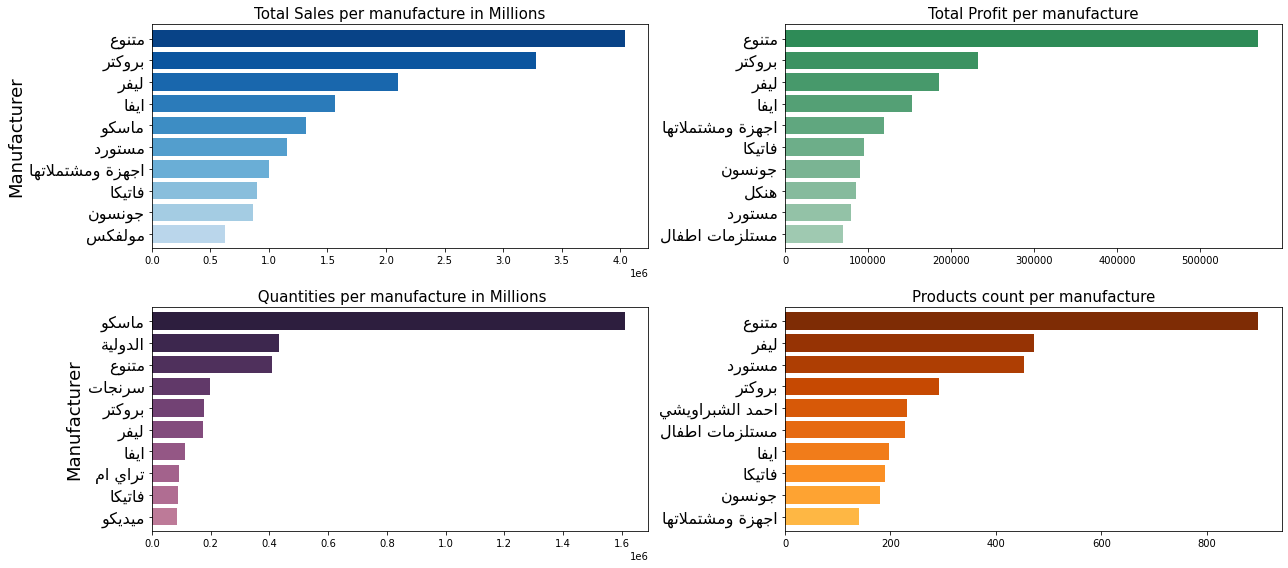

In [140]:
# Barh plot for each manufacturer perspictive.
f,ax=plt.subplots(2,2,figsize=(18,8))

#Sales
manufact_sales.sort_values(ascending=True).plot.barh(x='',
                     y='sales_total',
                     ax=ax[0,0],
                       color = blues,
                        width=0.8)


ax[0,0].set_ylabel('Manufacturer',fontsize=18)
plt.yticks(range(len(manufact_sales_lables)),manufact_sales_lables)
ax[0,0].set_yticklabels(manufact_sales_lables,fontsize=16)
ax[0,0].set_title('Total Sales per manufacture in Millions',fontsize=15)


#PROFIT
manufact_profit.sort_values(ascending=True).plot.barh(x='',
                                                      y='profit_total',
                                                     ax=ax[0,1],
                                                     color = green,
                                                     width = 0.8)

ax[0,1].set_ylabel('')
plt.yticks(range(len(manufact_profit_lables)),manufact_profit_lables)
ax[0,1].set_yticklabels(manufact_profit_lables,fontsize=16)
ax[0,1].set_title('Total Profit per manufacture',fontsize=15)


#Quantities
manufact_qty.sort_values(ascending=True).plot.barh(x='',
                                                   y='quantities',
                                                   ax=ax[1,0],
                                                   color = purple,
                                                   width=0.8)
 

ax[1,0].set_ylabel('Manufacturer',fontsize=18)
plt.yticks(range(len(manufact_qty_lables)),manufact_qty_lables)
ax[1,0].set_yticklabels(manufact_qty_lables,fontsize=16)
ax[1,0].set_title(' Quantities per manufacture in Millions',fontsize=15)


#Products
manufact_prod.sort_values(ascending=True).plot.barh(x='',
                                                    y='product',
                                                    ax=ax[1,1],
                                                    color = orange,
                                                    width=0.8)

 
ax[1,1].set_ylabel('')
plt.yticks(range(len(manufact_prod_lables)),manufact_prod_lables)
ax[1,1].set_yticklabels(manufact_prod_lables,fontsize=16)
ax[1,1].set_title('Products count per manufacture',fontsize=15)
plt.tight_layout()
plt.show()


**As shown, the manufacturer (متنوع) advances in sales volume, profits volume, and even the number of products listed under its name, but it falls ahead of (ماسكو) and (الدولية) in the number of pieces sold**

****

### Categories Visualization

In [141]:
#Reshape category labels
category_sales_labels = [get_display(reshape(label)) for label in category_highest_sales.index]
category_quantities_labels = [get_display(reshape(label)) for label in category_most_sales.index]
category_profit_labels = [get_display(reshape(label)) for label in category_best_sales.index]
category_products_labels = [get_display(reshape(label)) for label in products_in_each_category.index]
category_labels = [get_display(reshape(label)) for label in category_sales.category]

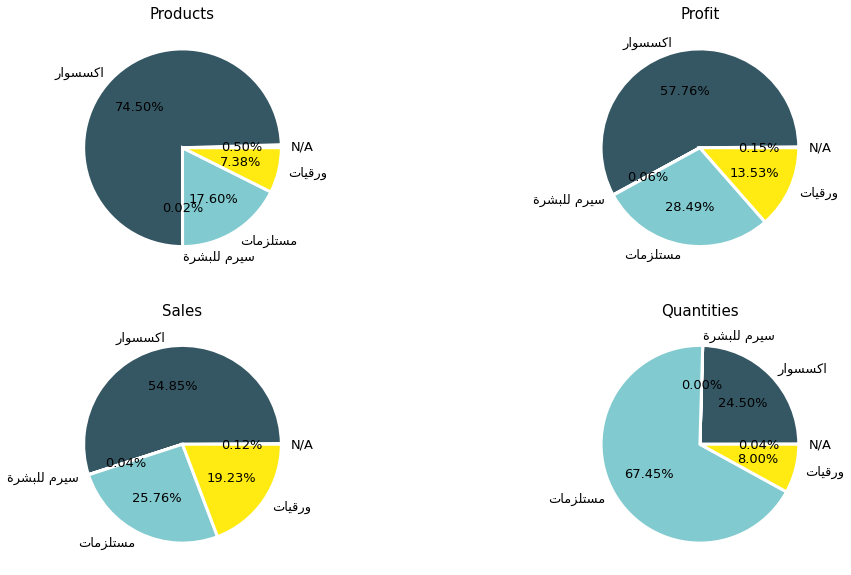

In [142]:
#Pie charts for each category  perspictive.
f,ax=plt.subplots(2,2,figsize=(17,10))

# Products pie chart

products_in_each_category.plot.pie(ax=ax[0,0]
                    ,labels=category_products_labels
                    ,autopct='%1.2f%%'
                    ,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
                    ,colors = ["#297CA0",'#355764', '#5A8F7B', '#81CACF', '#FFEA11']
                    ,fontsize= 13)
ax[0,0].set_ylabel('')
ax[0,0].set_xlabel('')
ax[0,0].set_title('Products',fontsize=15)


# Profit pie chart

category_best_sales.plot.pie(ax=ax[0,1]
                      ,labels=category_profit_labels
                      ,autopct='%1.2f%%'
                      ,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
                      ,colors = ["#297CA0",'#355764', '#5A8F7B', '#81CACF', '#FFEA11']
                      ,fontsize= 13)
ax[0,1].set_ylabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_title('Profit',fontsize=15)


# Sales pie chart

category_highest_sales.plot.pie(ax=ax[1,0]
                     ,labels=category_sales_labels
                     ,autopct='%1.2f%%'
                     ,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
                     ,colors = ["#297CA0",'#355764', '#5A8F7B', '#81CACF', '#FFEA11']
                     ,fontsize= 13)
ax[1,0].set_ylabel('')
ax[1,0].set_xlabel('')
ax[1,0].set_title('Sales',fontsize=15)


# Quantities pie chart

category_most_sales.plot.pie(ax=ax[1,1]
                   ,labels=category_quantities_labels
                   ,autopct='%1.2f%%'
                   ,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }
                   ,colors = ["#297CA0",'#355764', '#5A8F7B', '#81CACF', '#FFEA11']
                   ,fontsize= 13)
ax[1,1].set_ylabel('')
ax[1,1].set_xlabel('')
ax[1,1].set_title('Quantities',fontsize=15)



plt.show()

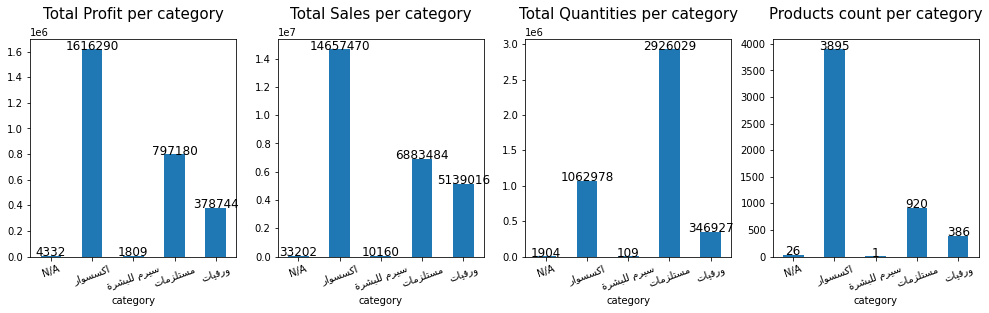

In [143]:


f,ax=plt.subplots(1,4,figsize=(17,4))

category_best_sales.plot.bar(x='category', y=category_best_sales.values, ax=ax[0])

for i, v in enumerate(category_best_sales.values):
    ax[0].text(i, v, "%d" %v, ha="center",va='baseline',color = 'black',size = 12)
    
plt.xticks(range(len(category_profit_labels)),category_profit_labels,rotation = 20)
ax[0].set_xticklabels(category_profit_labels, rotation = 20)
ax[0].set_title('Total Profit per category',pad = 20,fontsize=15)


category_highest_sales.plot.bar(x='category',
                     y='salestotal',
                     ax=ax[1])

for i, v in enumerate(category_highest_sales.values):
    ax[1].text(i, v, "%d" %v, ha="center",va='baseline',color = 'black',size = 12)
    
plt.xticks(range(len(category_sales_labels)),category_sales_labels,rotation = 20)
ax[1].set_xticklabels(category_sales_labels, rotation = 20)
ax[1].set_title('Total Sales per category',pad = 20,fontsize=15)


category_most_sales.plot.bar(x='category',
                   y='qty',
                   ax=ax[2])

for i, v in enumerate(category_most_sales.values):
    ax[2].text(i, v, "%d" %v, ha="center",va='baseline',color = 'black',size = 12)
    


plt.xticks(range(len(category_quantities_labels)),category_quantities_labels , rotation = 20)

ax[2].set_xticklabels(category_quantities_labels, rotation = 20)

ax[2].set_title('Total Quantities per category',pad = 20,fontsize=15)


products_in_each_category.plot.bar(x='category',
                    y='quantitiy',
                    ax=ax[3]
                   )
for i, v in enumerate(products_in_each_category.values):
    ax[3].text(i, v, "%d" %v, ha="center",va='baseline',color = 'black',size = 12)
    

plt.xticks(range(len(category_products_labels)),category_products_labels,rotation = 20)
ax[3].set_xticklabels(category_products_labels)
ax[3].set_title('Products count per category',pad = 20 ,fontsize=15)

plt.show()

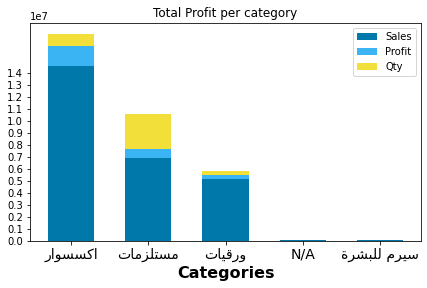

In [144]:
x= category_sales['category']
y1 = category_sales.sales_total
y2 =category_sales.profit_total
y3 = category_sales.quantities

fig,ax=plt.subplots(1,1,figsize=(7,4))

bar_l = np.arange(0, 3)
bar_width = .6

ax1 = ax.bar(x, y1, width=bar_width, label="A", color='#0078AA')
ax2 = ax.bar(x, y2, bottom=y1, width=bar_width, color="#3AB4F2")
ax3 = ax.bar(x, y3, bottom=y1+y2, width=bar_width, color="#F2DF3A")

plt.xticks(range(len(category_labels)),category_labels,rotation='horizontal', size=14 )

plt.yticks(range(0,15000000,1000000))

ax.set_ylabel('')
ax.set_xlabel('Categories',size=16,fontweight="bold")
ax.set_title('Total Profit per category')
ax.legend(['Sales','Profit','Qty'])
plt.show()

- As we mentioned earlier and confirmed by drawings, the (إكسسوار) category is the most distinguished among the categories in terms of sales, profits and the number of products listed under its name, but it is clearly declining in front of (مستلزمات) in the number of sold quantities.
- The quantities sold in the category (مستلزمات) need to be reviewed in terms of packing, as it is clear that some products have been assigned to the sales unit differently from the rest of the products. 

****

### Subcategories Visualization

In [145]:
#Reshape subcategoris labels
subcateg_profit_lables = [get_display(reshape(label)) for label in subcateg_profit.index]
subcateg_sales_lables = [get_display(reshape(label)) for label in subcateg_sales.index]
subcateg_qty_lables = [get_display(reshape(label)) for label in subcateg_qty.index]
subcateg_prod_lables = [get_display(reshape(label)) for label in subcateg_prod.index]
subcategory_labels = [get_display(reshape(label)) for label in top_subcategory_sales.subcategory]

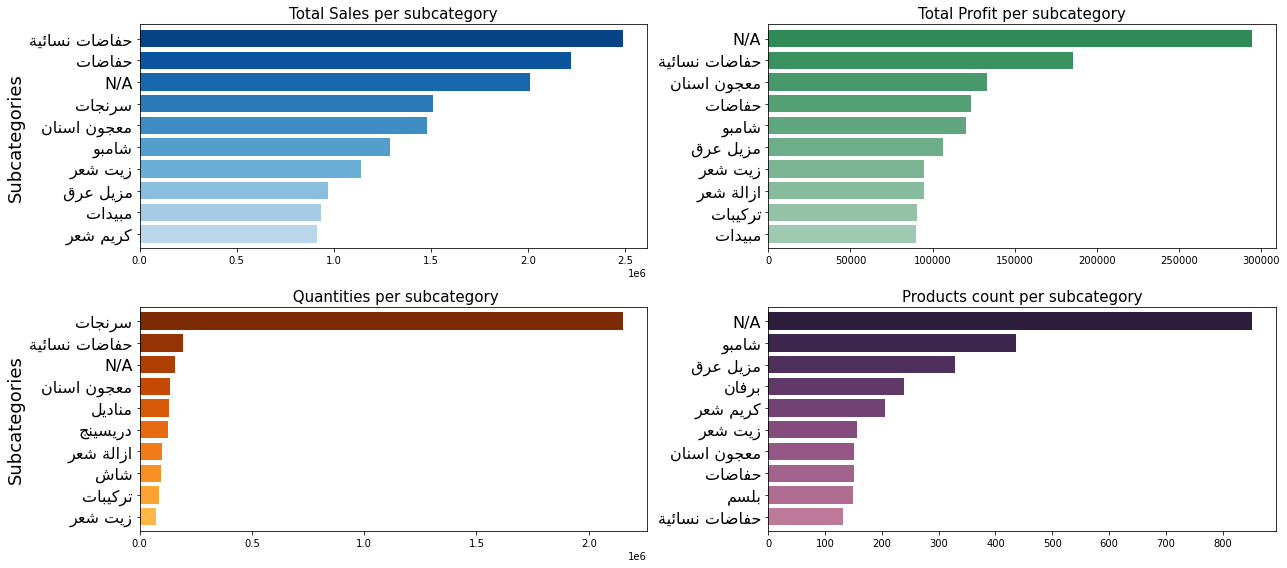

In [146]:
f,ax=plt.subplots(2,2,figsize=(18,8))

#Sales
subcateg_sales.sort_values(ascending=True).plot.barh(x='',
                     y='salestotal',
                     ax=ax[0,0],
                       color = blues,
                        width=0.8)


ax[0,0].set_ylabel('Subcategories',fontsize=18)
plt.yticks(range(len(subcateg_sales_lables)),subcateg_sales_lables)
ax[0,0].set_yticklabels(subcateg_sales_lables,fontsize=16)
ax[0,0].set_title('Total Sales per subcategory',fontsize=15)


#PROFIT
subcateg_profit.sort_values(ascending=True).plot.barh(x='',
                                                      y='profit',
                                                     ax=ax[0,1],
                                                     color = green,
                                                     width = 0.8)

ax[0,1].set_ylabel('')
plt.yticks(range(len(subcateg_profit_lables)),subcateg_profit_lables)
ax[0,1].set_yticklabels(subcateg_profit_lables,fontsize=16)
ax[0,1].set_title('Total Profit per subcategory',fontsize=15)


#Quantities
subcateg_qty.sort_values(ascending=True).plot.barh(x='',
                                                   y='qty',
                                                   ax=ax[1,0],
                                                   color = orange,
                                                   width=0.8)
 
    
ax[1,0].set_ylabel('Subcategories',fontsize=18)
plt.yticks(range(len(subcateg_qty_lables)),subcateg_qty_lables)
ax[1,0].set_yticklabels(subcateg_qty_lables,fontsize=16)
ax[1,0].set_title(' Quantities per subcategory',fontsize=15)


#Products
subcateg_prod.sort_values(ascending=True).plot.barh(x='',
                                                    y='product',
                                                    ax=ax[1,1],
                                                    color = purple,
                                                    width=0.8)

 
ax[1,1].set_ylabel('')
plt.yticks(range(len(subcateg_prod_lables)),subcateg_prod_lables)
ax[1,1].set_yticklabels(subcateg_prod_lables,fontsize=16)
ax[1,1].set_title('Products count per subcategory',fontsize=15)

plt.tight_layout()

plt.show()


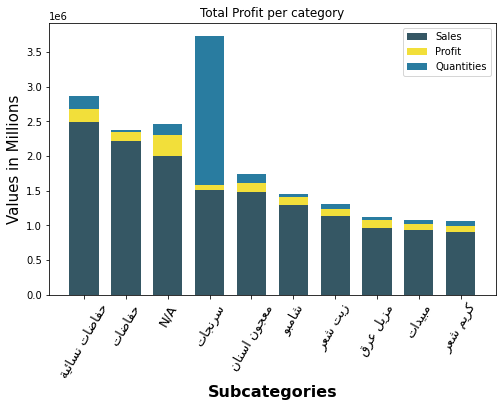

In [147]:

x= top_subcategory_sales['subcategory']
y1 = top_subcategory_sales.sales_total
y2 =top_subcategory_sales.profit_total
y3 = top_subcategory_sales.quantities

fig,ax=plt.subplots(1,1,figsize=(8,5))

bar_l = np.arange(0, 3)
bar_width = .7

ax1 = ax.bar(x, y1, width=bar_width, label="A", color='#355764')
ax2 = ax.bar(x, y2, bottom=y1, width=bar_width, color="#F2DF3A")
ax3 = ax.bar(x, y3, bottom=y1+y2, width=bar_width, color="#297CA0")

plt.xticks(range(len(subcategory_labels)),subcategory_labels,rotation=60, size=13 )



ax.set_ylabel('Values in Millions',size = 15)
ax.set_xlabel('Subcategories',size=16,fontweight="bold")
ax.set_title('Total Profit per category')
ax.legend(['Sales','Profit','Quantities'])
plt.show()

- The sub-category that contains the largest undisputed quantities is (سرنجات), which is less in sales by a significant difference.
- (حفاضات نسائية) tops the best sub-category in terms of sales volume, with 2.890 million pounds.
- (حفاضات نسائية)  is the most profitable sub-category of knowledge, with an amount of 185k pounds.
- There is a **851** product out of **5256** products that is not under a sub categorical classification.
- It is very striking because the items that are not subject to a categorization have achieved profits 294k.

****

### Locations visualization

In [148]:
#Reshape Locations labels
location_profit_lables = [get_display(reshape(label)) for label in location_profit.index]
location_sales_lables = [get_display(reshape(label)) for label in location_sales.index]
location_clients_lables = [get_display(reshape(label)) for label in location_clients.index]
location_invoices_lables = [get_display(reshape(label)) for label in location_invoices.index]

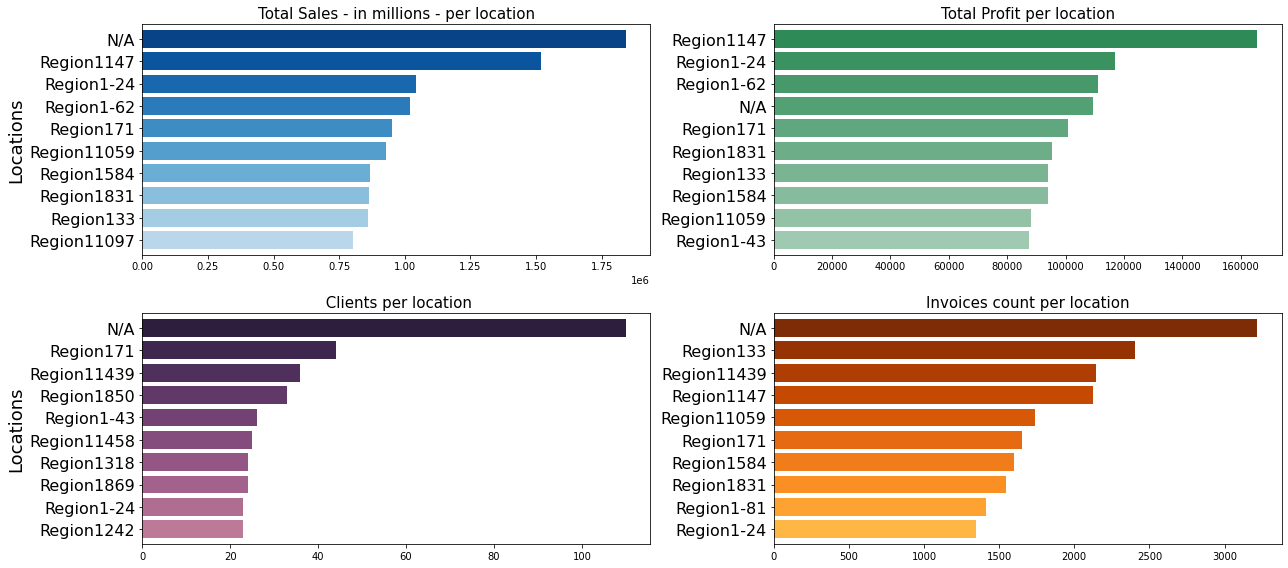

In [149]:
f,ax=plt.subplots(2,2,figsize=(18,8))

#Sales
location_sales.sort_values(ascending=True).plot.barh(x='',
                     y='salestotal',
                     ax=ax[0,0],
                       color = blues,
                        width=0.8)


ax[0,0].set_ylabel('Locations',fontsize=18)
plt.yticks(range(len(location_sales_lables)),location_sales_lables)
ax[0,0].set_yticklabels(location_sales_lables,fontsize=16)
ax[0,0].set_title('Total Sales - in millions - per location',fontsize=15)


#PROFIT
location_profit.sort_values(ascending=True).plot.barh(x='',
                                                      y='profit',
                                                     ax=ax[0,1],
                                                     color = green,
                                                     width = 0.8)

ax[0,1].set_ylabel('')
plt.yticks(range(len(location_profit_lables)),location_profit_lables)
ax[0,1].set_yticklabels(location_profit_lables,fontsize=16)
ax[0,1].set_title('Total Profit per location',fontsize=15)


#Clients
location_clients.sort_values(ascending=True).plot.barh(x='',
                                                   y='qty',
                                                   ax=ax[1,0],
                                                   color = purple,
                                                   width=0.8)
 
    
ax[1,0].set_ylabel('Locations',fontsize=18)
plt.yticks(range(len(location_clients_lables)),location_clients_lables)
ax[1,0].set_yticklabels(location_clients_lables,fontsize=16)
ax[1,0].set_title(' Clients per location',fontsize=15)


#Invoices
location_invoices.sort_values(ascending=True).plot.barh(x='',
                                                    y='product',
                                                    ax=ax[1,1],
                                                    color = orange,
                                                    width=0.8)

 
ax[1,1].set_ylabel('')
plt.yticks(range(len(location_invoices_lables)),location_invoices_lables)
ax[1,1].set_yticklabels(location_invoices_lables,fontsize=16)
ax[1,1].set_title('Invoices count per location',fontsize=15)

plt.tight_layout()

plt.show()


- There are 110 clients whose city does not exist. Their sales volume is 1,841mil pounds, and our profits from them are 109k pounds.
- **Region1147** is our best selling and profitable region, although we have only five customers in it. Our sales reached 1.5mil pounds, and our profits amounted to 165k pounds.

****

### Products visualization

In [150]:
#Products labels
product_profit_lables = [get_display(reshape(label)) for label in product_profit.index]
product_sales_lables = [get_display(reshape(label)) for label in product_sales.index]
product_qty_lables = [get_display(reshape(label)) for label in product_qty.index]

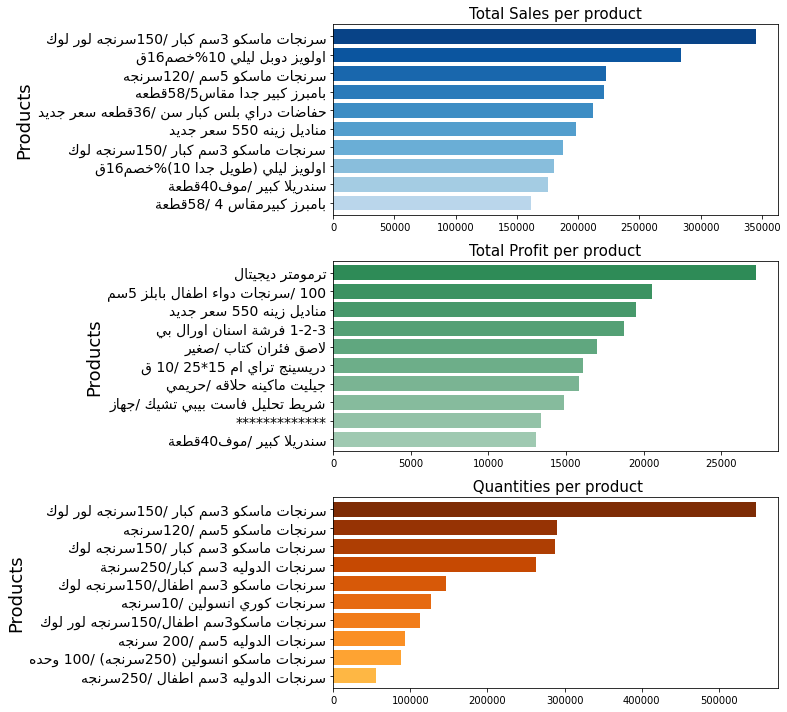

In [151]:
f,ax=plt.subplots(3,1,figsize=(11,10))

#Sales
product_sales.sort_values(ascending=True).plot.barh(x='',
                     y='salestotal',
                     ax=ax[0],
                       color = blues,
                        width=0.8)


ax[0].set_ylabel('Products',fontsize=18)
plt.yticks(range(len(product_sales_lables)),product_sales_lables)
ax[0].set_yticklabels(product_sales_lables,fontsize=14)
ax[0].set_title('Total Sales per product',fontsize=15)


#PROFIT
product_profit.sort_values(ascending=True).plot.barh(x='',
                                                      y='profit',
                                                     ax=ax[1],
                                                     color = green,
                                                     width = 0.8)

ax[1].set_ylabel('Products',fontsize=18)
plt.yticks(range(len(product_profit_lables)),product_profit_lables)
ax[1].set_yticklabels(product_profit_lables,fontsize=14)
ax[1].set_title('Total Profit per product',fontsize=15)


#Quantities
product_qty.sort_values(ascending=True).plot.barh(x='',
                                                   y='qty',
                                                   ax=ax[2],
                                                   color = orange,
                                                   width=0.8)
 
    
ax[2].set_ylabel('Products',fontsize=18)
plt.yticks(range(len(product_qty_lables)),product_qty_lables)
ax[2].set_yticklabels(product_qty_lables,fontsize=14)
ax[2].set_title(' Quantities per product',fontsize=15)

plt.tight_layout()
plt.show()


- (سرنجات ماسكو 3سم كبار /150 سرنجة لور لوك) top the volume of sales and quantities sold, but they are not found in the top 10 profitable products.
- Our best profitable product is (ترمومتر ديجيتال) with 27k pounds. 

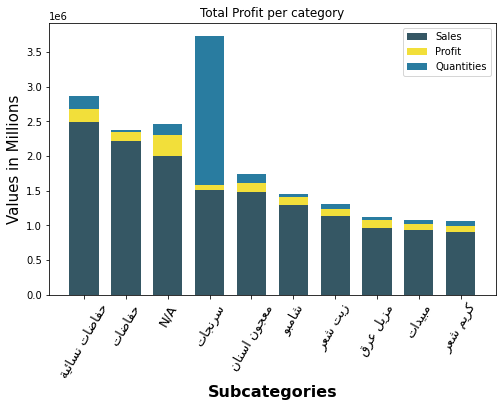

In [152]:
#297CA0
x= top_subcategory_sales['subcategory']
y1 = top_subcategory_sales.sales_total
y2 =top_subcategory_sales.profit_total
y3 = top_subcategory_sales.quantities

fig,ax=plt.subplots(1,1,figsize=(8,5))

bar_l = np.arange(0, 3)
bar_width = .7

ax1 = ax.bar(x, y1, width=bar_width, label="A", color='#355764')
ax2 = ax.bar(x, y2, bottom=y1, width=bar_width, color="#F2DF3A")
ax3 = ax.bar(x, y3, bottom=y1+y2, width=bar_width, color="#297CA0")

plt.xticks(range(len(subcategory_labels)),subcategory_labels,rotation=60, size=13 )



ax.set_ylabel('Values in Millions',size = 15)
ax.set_xlabel('Subcategories',size=16,fontweight="bold")
ax.set_title('Total Profit per category')
ax.legend(['Sales','Profit','Quantities'])
plt.show()

****

### Clients visualization

In [153]:
#Clients labels
top_clients_labels = [get_display(reshape(label)) for label in top_clients_sales.client]
client_profit_labels = [get_display(reshape(label)) for label in client_profit.index]
client_sales_lables = [get_display(reshape(label)) for label in client_sales.index]
client_invoices_labels = [get_display(reshape(label)) for label in client_invoices.index]

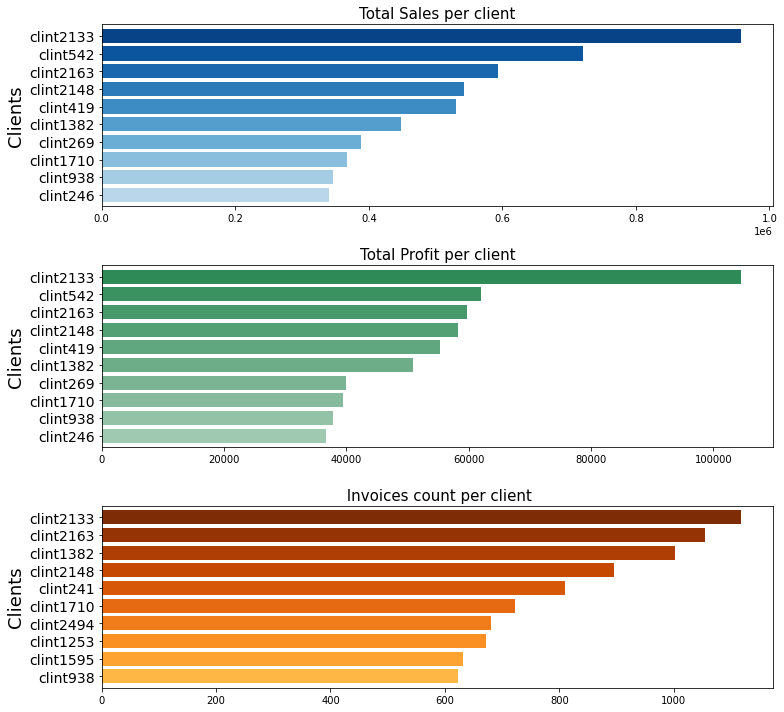

In [154]:
f,ax=plt.subplots(3,1,figsize=(11,10))

#Sales
client_sales.sort_values(ascending=True).plot.barh(x='',
                     y='salestotal',
                     ax=ax[0],
                       color = blues,
                        width=0.8)


ax[0].set_ylabel('Clients',fontsize=18)
plt.yticks(range(len(client_profit_labels)),client_profit_labels)
ax[0].set_yticklabels(client_profit_labels,fontsize=14)
ax[0].set_title('Total Sales per client',fontsize=15)


#PROFIT
client_profit.sort_values(ascending=True).plot.barh(x='',
                                                      y='profit',
                                                     ax=ax[1],
                                                     color = green,
                                                     width = 0.8)

ax[1].set_ylabel('Clients',fontsize=18)
plt.yticks(range(len(client_profit_labels)),client_profit_labels)
ax[1].set_yticklabels(client_profit_labels,fontsize=14)
ax[1].set_title('Total Profit per client',fontsize=15)


#Invoices
client_invoices.sort_values(ascending=True).plot.barh(x='',
                                                   y='invoices',
                                                   ax=ax[2],
                                                   color = orange,
                                                   width=0.8)
 
    
ax[2].set_ylabel('Clients',fontsize=18)
plt.yticks(range(len(client_invoices_labels)),client_invoices_labels)
ax[2].set_yticklabels(client_invoices_labels,fontsize=14)
ax[2].set_title(' Invoices count per client',fontsize=15)

plt.tight_layout()
plt.show()


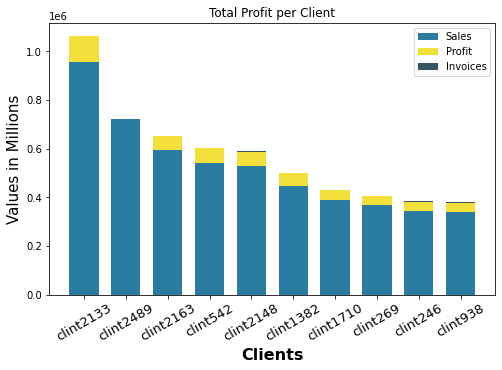

In [155]:

x= top_clients_sales['client']
y1 = top_clients_sales.sales_total
y2 =top_clients_sales.profit_total
y3 = top_clients_sales.invoice_id

fig,ax=plt.subplots(1,1,figsize=(8,5))

bar_l = np.arange(0, 3)
bar_width = .7

ax1 = ax.bar(x, y1, width=bar_width, label="A", color='#297CA0')
ax2 = ax.bar(x, y2, bottom=y1, width=bar_width, color="#F2DF3A")
ax3 = ax.bar(x, y3, bottom=y1+y2, width=bar_width, color="#355764")

plt.xticks(range(len(top_clients_labels)),top_clients_labels,rotation=30, size=13 )



ax.set_ylabel('Values in Millions',size = 15)
ax.set_xlabel('Clients',size=16,fontweight="bold")
ax.set_title('Total Profit per Client')
ax.legend(['Sales','Profit','Invoices'])
plt.show()

- It's a one man Show thanks to (clint2133).

****

### Date-Monthly visualization

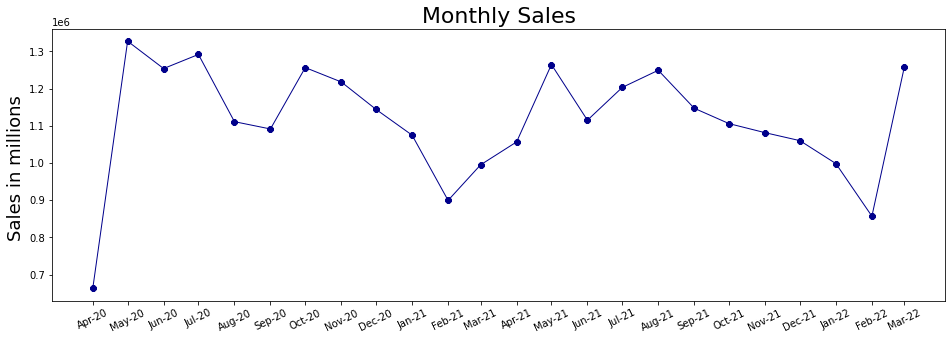

In [156]:
#Monthly sales

sales_overtime =data.groupby(['month_year','month_label']).sum()['sales_total'].reset_index()

month_labels = list(sales_overtime.month_label)

plt.figure(figsize=(16, 5))
plt.plot(sales_overtime['month_year'], sales_overtime['sales_total'],
         color='darkblue',
         marker='8',
         markerfacecolor='darkblue',
         linewidth=1,
         markersize=7)

plt.xticks(sales_overtime['month_year'], month_labels, rotation=26)

plt.ylabel('Sales in millions ', fontsize = 18)

plt.title ("Monthly Sales",fontsize = 22)

plt.show()

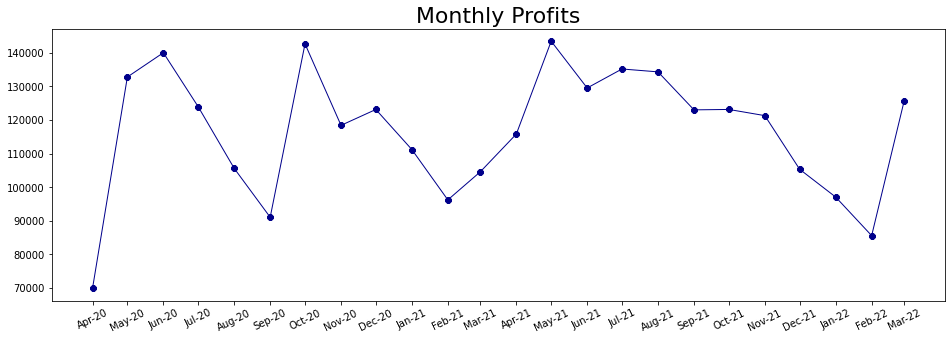

In [157]:
#Monthly profits

profit_overtime =data.groupby(['month_year','month_label']).sum()['profit_total'].reset_index()

plt.figure(figsize=(16, 5))

plt.plot(profit_overtime['month_year'], profit_overtime['profit_total'],
         color='darkblue',
         marker='8',
         markerfacecolor='darkblue',
         linewidth=1,
         markersize=7)

plt.xticks(profit_overtime['month_year'], month_labels, rotation=26)

plt.title ("Monthly Profits", size=22)

plt.show()

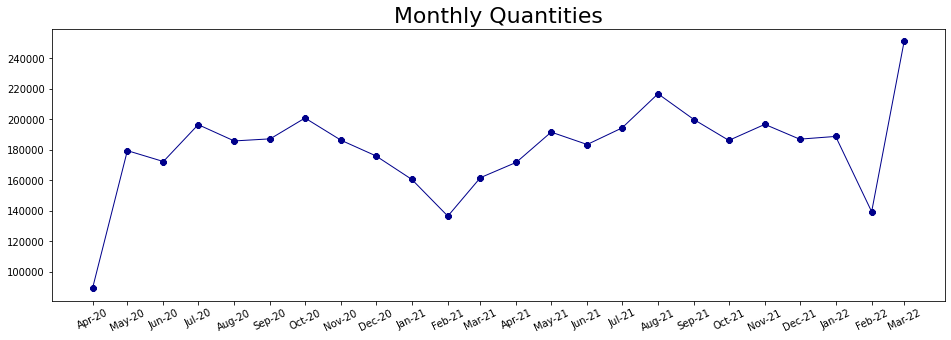

In [158]:
qty_overtime =data.groupby(['month_year','month_label']).sum()['quantities'].reset_index()

plt.figure(figsize=(16, 5))
plt.plot(qty_overtime['month_year'], qty_overtime['quantities'],
         color='darkblue',
         marker='8',
         markerfacecolor='darkblue',
         linewidth=1,
         markersize=7)
plt.xticks(qty_overtime['month_year'], month_labels, rotation=26)
plt.title ("Monthly Quantities", size=22)

plt.show()

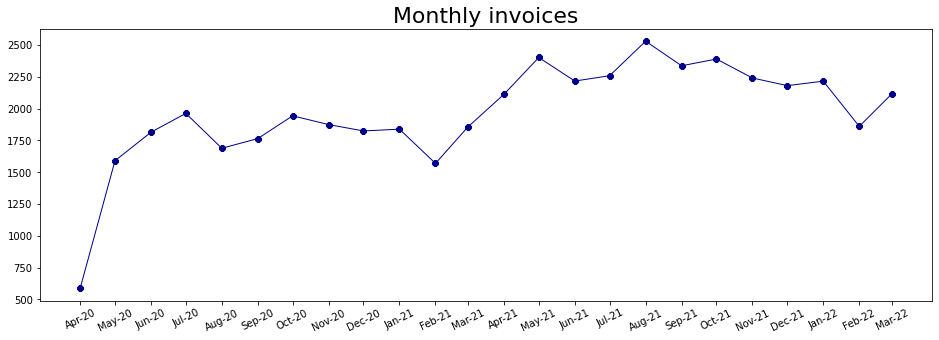

In [159]:
#Monthly invoices

invoiceid_overtime =data.groupby(['month_year','month_label']).nunique()['invoice_id'].reset_index()

plt.figure(figsize=(16, 5))

plt.plot(invoiceid_overtime['month_year'], invoiceid_overtime['invoice_id'],
         color='darkblue',
         marker='8',
         markerfacecolor='darkblue',
         linewidth=1,
         markersize=7)

plt.xticks(invoiceid_overtime['month_year'], month_labels, rotation=26)

plt.title ("Monthly invoices", size=22)

plt.show()

- Sales increased significantly in May in 2020 and 2021.
- In Feb everything went down the number of invoices, sales and profits.
- May 2021 is the most profitable month.
- March 2022 has the largest quantities ever were sold.

****

<a id='conclusion'></a>
## Conclusion 

### Alerts and challenges.
> <li>The database contains a large number of spelling errors and many columns titles that do not express the contents of the real data.
> <li>Some of the names of the manufacturers are not expressive, and this affected the quality of the extracted information. 
> <li>There are names of products whose real name has been replaced with *******, and there are many sales made on them.
> <li>There are products that are not listed under any major category(26), subcategory(851) or manufacturer (83), please review them.
> <li>The quantities sold in the subcategory (سرنجات) need to be reviewed in terms of packing, as it is clear that some products have been assigned to the sales unit differently from the rest of the products.    
> <li>There are 100 thousand profit from customers whose locations we did not know.
> <li>We need to review the pricing policy for the client clint2489, as the profit rate is very low (0.32) less than 1%.        
### Main points  
    
> <li>The highest selling manufacturer is "متنوع" with 3.3mil pound and the most profitable product in It is (لاصق فئران كتاب /صغير) with around 17k pounds and 66k total sales and this is a High profit rate.
    
> <li>The lowest profit rate - compared to total sales - achieved by "ورقيات" category (7%) and the percentage is almost equal between (مستلزمات - %11.5) and (اكسسوار - %11).
    
> <li>The "مزيل عرق" subcategory had the highest profit percentage - compared to total sales - (10.98%) and the largest subcategory with sales of 2.489 million pounds (حفاضات نسائية- %7.44).
    
> <li>It is recommended for subcategory (حفاضات نسائية) to increase the demand from manufacturer (برايفت) more than (سندريلا) because the profit rate is greater than (سندريلا).
    
> <li>Although it has only five clients, "Region1147" is the best area we have with a total sales of 1.5 million pounds.. and the best customer in it is "clint2133".

> <li>Our best profitable product is (ترمومتر ديجيتال) with 27k pounds.

> <li>Sales increased significantly in May in 2020 and 2021.

> <li>In Feb everything went down the number of invoices, sales and profits.
    
> <li>May 2021 is the most profitable month.

> <li>March 2022 has the largest quantities ever were sold. 
    
    
### Recommendations

> <li>Review the data of items and customers and adjust them as much as possible.

> <li>Dividing customers into segments because there is a large disparity between the percentages of profits for customers in a way that does not correspond to their sales volume.

> <li>It is recommended to open more dealings with the manufacturer (بروكتور) due to the confidence of our customers in its products.